<a href="https://colab.research.google.com/github/ClaudiaTurner/GEOG5990M_Project/blob/main/Final_Project_Python_GEOG5990M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment

Student ID number: 201893759

## **BLOCK 1: NON-SPATIAL VISUALISATION**

Block 1 explores residential property sales across all districts in England from 2000 to 2023, with the aim of identifying peak sales years and top-performing areas to inform housing market analysis.

**Dataset:** Residential property sales

**Audience:** Business stakeholders and market analysts

**Final Visualisation:** Top 20 districts in England by residential property sales (2000 - 2023)


### **1.1 PACKAGE IMPORTS & DATA LOADING**

To begin with the first Block, a range of Python packages is used to upload, manage, and visualise the data, including pandas, matplotlib, and numpy, among others. To support clear and inclusive visual communication, colourblind-safe palettes are applied throughout using colormaps from matplotlib (Wong, 2011).

Following the package imports, a CSV file sourced from NOMIS (2023) is uploaded from the GitHub repository. This dataset contains residential property sales records for England and Wales, spanning the years 1995 to 2023.

In [1]:

# ----- IMPORT core packages for data handling and visualisation -----

import pandas as pd                               # For structured data handling and CSV operations (Nelli, 2023)
import matplotlib.pyplot as plt                   # For producing general-purpose plots such as line and bar charts (Walker, 2020)
import numpy as np                                # For numerical operations, including creating year ranges and calculating statistics (Walker, 2020)
import seaborn as sns                             # For enhanced statistical visualisation (Rajagopalan, 2021)


from matplotlib import colormaps                  # For using modern, colourblind-safe colormaps (Wong, 2011)
from matplotlib.ticker import FuncFormatter       # Axis formatting
from matplotlib.lines import Line2D               # Used to create custom legend elements (lines, markers, etc.)
                                                  # Example: Used to create square and circle markers in the map legend.


In [2]:

# ----- UPLOAD DATA-----

# The DataFrame we will use contains information on the number of houses sold from 1996 to 2023 across all districts in England. Our analysis will cover 2000 to 2023.
# To upload the data (CSV), I’ll paste the GitHub file path below and replace /bob/ for /raw/:

Sales_England=pd.read_csv('https://github.com/ClaudiaTurner/GEOG5990M_Project/raw/main/Data_Assignment_2/Eng_sales_1995_2025_Exp.csv')

# To understand the data better, take a quick look at the first six rows
display(Sales_England.head(6))

# Add a row and column info below the table, with a title and a line break to enhance clarity.
print('\nNumber of rows and columns:')
print(Sales_England.shape)


Residential property sales Unnamed: 1 Unnamed: 2  \
0  ONS Crown Copyright Reserved [from Nomis on 8 ...        NaN        NaN   
1                                    Count of sales:      Sales        NaN   
2                                                NaN        NaN        NaN   
3                                                row     Sep-96     Sep-97   
4                                                NaN        NaN        NaN   
5                                                  1     850013    1047268   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3     Sep-98     Sep-99     Sep-00     Sep-01     Sep-02     Sep-03   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5    1016037    1084672    1130983    1133620    1271168    1153345   

  Unnamed: 9  ... Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25  \
0        NaN  ...         NaN         NaN         NaN         NaN         NaN   
1        NaN  ...         NaN         NaN         NaN         NaN         NaN   
2        NaN  ...         NaN         NaN         NaN         NaN         NaN   
3     Sep-04  ...      Sep-16      Sep-17      Sep-18      Sep-19      Sep-20   
4        NaN  ...         NaN         NaN         NaN         NaN         NaN   
5    1264229  ...      903005      852771      829715      803012      669410   

  Unnamed: 26 Unnamed: 27 Unnamed: 28      Unnamed: 29 Unnamed: 30  
0         NaN         NaN         NaN              NaN         NaN  
1         NaN         NaN         NaN              NaN         NaN  
2         NaN         NaN         NaN              NaN         NaN  
3      Sep-21      Sep-22      Sep-23             Area    mnemonic  
4         NaN         NaN         NaN              NaN         NaN  
5     1081660      787290      573646  country:England   E92000001  

[6 rows x 31 columns]


Number of rows and columns:
(334, 31)


### **1.2 DATA CLEANING**

The dataset was cleaned to ensure it was reliable for analysis and visualisation. The original CSV file included non-data elements such as metadata in the first four rows, which were excluded using the skiprows function (Walker, 2020). The dataset was then filtered to include only England from 2000 to 2023, aligning with the study’s objective to focus on recent housing market trends. Irrelevant columns—such as row numbers and region codes—were removed to simplify the structure and reduce visual clutter in later outputs.

Additional steps involved removing rows with null values, renaming and reordering variables for clarity, and standardising inconsistent district names (e.g., ladu2023:Torfaen) to improve compatibility with visual and spatial outputs (Nelli, 2023).

In [3]:

# ----- ELIMINATING ROWS -----

# The original CSV file contains metadata or extraneous information in the first four rows,
# such as empty fields and non-header content (e.g., 'Unnamed: 1' just being a blank column).
# The actual column headers (e.g., 'Sep-96', 'Area', etc.) begin on the fifth row.

# To clean the data, we skip the first four rows using `skiprows=4`.
# This ensures that the DataFrame begins with the correct headers.
Sales_England = pd.read_csv(
    'https://github.com/ClaudiaTurner/GEOG5990M/raw/main/Sales_1995_2023_England_Districts_exp.csv',
    skiprows=4)

# Preview the cleaned dataset to confirm that the headers and structure are now correct.
print('\nATTRIBUTE TABLE: First 5 rows')
display(Sales_England.head())

# Check data types to understand the structure of the dataset and identify any potential issues.
print('\nDATA TYPES:')
print(Sales_England.dtypes)



ATTRIBUTE TABLE: First 5 rows


row    Sep-96     Sep-97     Sep-98     Sep-99     Sep-00     Sep-01  \
0  NaN       NaN        NaN        NaN        NaN        NaN        NaN   
1  1.0  850013.0  1047268.0  1016037.0  1084672.0  1130983.0  1133620.0   
2  2.0    1159.0     1390.0     1405.0     1440.0     1726.0     2140.0   
3  3.0    1776.0     1934.0     1948.0     2055.0     2280.0     2462.0   
4  4.0    1879.0     2000.0     1957.0     1986.0     2266.0     2582.0   

      Sep-02     Sep-03     Sep-04  ...    Sep-16    Sep-17    Sep-18  \
0        NaN        NaN        NaN  ...       NaN       NaN       NaN   
1  1271168.0  1153345.0  1264229.0  ...  903005.0  852771.0  829715.0   
2     2359.0     2488.0     2979.0  ...    1273.0    1209.0    1304.0   
3     2826.0     3016.0     3339.0  ...    1822.0    1749.0    1819.0   
4     3497.0     3390.0     3138.0  ...    1824.0    1947.0    2007.0   

     Sep-19    Sep-20     Sep-21    Sep-22    Sep-23  \
0       NaN       NaN        NaN       NaN       NaN   
1  803012.0  669410.0  1081660.0  787290.0  573646.0   
2    1235.0    1050.0     1729.0    1490.0    1103.0   
3    1828.0    1528.0     2316.0    2035.0    1298.0   
4    1967.0    1636.0     2539.0    2081.0    1667.0   

                            Area   mnemonic  
0                            NaN        NaN  
1                country:England  E92000001  
2            ladu2023:Hartlepool  E06000001  
3         ladu2023:Middlesbrough  E06000002  
4  ladu2023:Redcar and Cleveland  E06000003  

[5 rows x 31 columns]


DATA TYPES:
row         float64
Sep-96      float64
Sep-97      float64
Sep-98      float64
Sep-99      float64
Sep-00      float64
Sep-01      float64
Sep-02      float64
Sep-03      float64
Sep-04      float64
Sep-05      float64
Sep-06      float64
Sep-07      float64
Sep-08      float64
Sep-09      float64
Sep-10      float64
Sep-11      float64
Sep-12      float64
Sep-13      float64
Sep-14      float64
Sep-15      float64
Sep-16      float64
Sep-17      float64
Sep-18      float64
Sep-19      float64
Sep-20      float64
Sep-21      float64
Sep-22      float64
Sep-23      float64
Area         object
mnemonic     object
dtype: object


In [4]:

# ----- DROPPING UNUSED COLUMNS -----

# This analysis focuses on the period from 2000 to 2023, so earlier years are removed.
# The 'row' column is also dropped as it simply duplicates the row index.
Sales_England = Sales_England.drop(columns=[
    'row', 'Sep-96', 'Sep-97', 'Sep-98', 'Sep-99'])

# Check remaining columns to confirm removal
Sales_England.columns.tolist()  # Converts column index to a regular list for review


['Sep-00',
 'Sep-01',
 'Sep-02',
 'Sep-03',
 'Sep-04',
 'Sep-05',
 'Sep-06',
 'Sep-07',
 'Sep-08',
 'Sep-09',
 'Sep-10',
 'Sep-11',
 'Sep-12',
 'Sep-13',
 'Sep-14',
 'Sep-15',
 'Sep-16',
 'Sep-17',
 'Sep-18',
 'Sep-19',
 'Sep-20',
 'Sep-21',
 'Sep-22',
 'Sep-23',
 'Area',
 'mnemonic']

In [5]:

# ----- NULL VALUES -----

# Search for null values and delete them to enhance clarity
# The Null values represent the empty cells within the CSV document
print(Sales_England.isnull().sum())


Sep-00      1
Sep-01      1
Sep-02      1
Sep-03      1
Sep-04      1
Sep-05      1
Sep-06      1
Sep-07      1
Sep-08      1
Sep-09      1
Sep-10      1
Sep-11      1
Sep-12      1
Sep-13      1
Sep-14      1
Sep-15      1
Sep-16      1
Sep-17      1
Sep-18      1
Sep-19      1
Sep-20      1
Sep-21      1
Sep-22      1
Sep-23      1
Area        1
mnemonic    1
dtype: int64


In [6]:

# Eliminate null values to further clean the data
Sales_England = Sales_England.dropna()

# Check that the null values were successfully deleted
Sales_England.head(3)


Sep-00     Sep-01     Sep-02     Sep-03     Sep-04    Sep-05     Sep-06  \
1  1130983.0  1133620.0  1271168.0  1153345.0  1264229.0  976245.0  1203858.0   
2     1726.0     2140.0     2359.0     2488.0     2979.0    2123.0     2285.0   
3     2280.0     2462.0     2826.0     3016.0     3339.0    2817.0     3139.0   

      Sep-07    Sep-08    Sep-09  ...    Sep-16    Sep-17    Sep-18    Sep-19  \
1  1279204.0  778905.0  516601.0  ...  903005.0  852771.0  829715.0  803012.0   
2     2290.0    1469.0     747.0  ...    1273.0    1209.0    1304.0    1235.0   
3     3514.0    2188.0    1050.0  ...    1822.0    1749.0    1819.0    1828.0   

     Sep-20     Sep-21    Sep-22    Sep-23                    Area   mnemonic  
1  669410.0  1081660.0  787290.0  573646.0         country:England  E92000001  
2    1050.0     1729.0    1490.0    1103.0     ladu2023:Hartlepool  E06000001  
3    1528.0     2316.0    2035.0    1298.0  ladu2023:Middlesbrough  E06000002  

[3 rows x 26 columns]

In [7]:

# ----- FILTER -----

# The dataset includes data for both England and Wales.
# We want to filter the data to include only England.
# Since there are no missing values in the 'mnemonic' column,
# we can safely filter rows that do not start with 'W' (which indicates Welsh data).

Sales_England = Sales_England[~Sales_England['mnemonic'].str.startswith('W')]

# Display the last few rows of the filtered DataFrame to verify that Welsh rows have been removed.
Sales_England.tail()


Sep-00   Sep-01   Sep-02   Sep-03   Sep-04  Sep-05   Sep-06   Sep-07  \
293   1562.0   1537.0   1861.0   1596.0   1678.0  1291.0   1481.0   1630.0   
294   2950.0   2922.0   3307.0   3085.0   3301.0  2531.0   3329.0   3548.0   
295   2545.0   2394.0   2594.0   2227.0   2510.0  1941.0   2523.0   2669.0   
296   2089.0   1905.0   2098.0   1707.0   1940.0  1433.0   1990.0   2013.0   
297  12954.0  13117.0  13903.0  11840.0  13470.0  9786.0  13209.0  13385.0   

     Sep-08  Sep-09  ...   Sep-16   Sep-17   Sep-18  Sep-19  Sep-20   Sep-21  \
293  1059.0   749.0  ...   1514.0   1349.0   1366.0  1237.0  1085.0   1960.0   
294  2003.0  1493.0  ...   2464.0   2356.0   2222.0  2168.0  1784.0   2531.0   
295  1753.0  1369.0  ...   2191.0   1979.0   2030.0  2105.0  1696.0   2952.0   
296  1202.0  1071.0  ...   1941.0   1957.0   1947.0  1809.0  1476.0   2277.0   
297  8235.0  6137.0  ...  11197.0  10703.0  10120.0  9465.0  7955.0  13387.0   

     Sep-22  Sep-23                     Area   mnemonic  
293  1361.0   897.0  ladu2023:Forest of Dean  E07000080  
294  1972.0  1594.0      ladu2023:Gloucester  E07000081  
295  2008.0  1398.0          ladu2023:Stroud  E07000082  
296  1679.0  1133.0      ladu2023:Tewkesbury  E07000083  
297  9238.0  6791.0        ladu2023:Somerset  E06000066  

[5 rows x 26 columns]

In [8]:

# ----- RENAMING AND REORDERING COLUMNS -----

# To further clean and organize the dataset:
# 1. Rename the columns for clarity:
#    - Convert date strings like 'Sep-13' to just '2013' to standardize the year format.
#    - Rename 'Area' to 'DISTRICT' for better semantic clarity.
#    - Rename 'mnemonic' to 'CODE_LAD' to reflect district code naming conventions.

Sales_England = Sales_England.rename(columns={
    'Sep-00': '2000', 'Sep-01': '2001', 'Sep-02': '2002', 'Sep-03': '2003', 'Sep-04': '2004',
    'Sep-05': '2005', 'Sep-06': '2006', 'Sep-07': '2007', 'Sep-08': '2008', 'Sep-09': '2009',
    'Sep-10': '2010', 'Sep-11': '2011', 'Sep-12': '2012', 'Sep-13': '2013', 'Sep-14': '2014',
    'Sep-15': '2015', 'Sep-16': '2016', 'Sep-17': '2017', 'Sep-18': '2018', 'Sep-19': '2019',
    'Sep-20': '2020', 'Sep-21': '2021', 'Sep-22': '2022', 'Sep-23': '2023',
    'Area': 'DISTRICT', 'mnemonic': 'CODE_LAD'})

# 2. Reorder columns:
#    - Place identifier columns ('DISTRICT' and 'CODE_LAD') first.
#    - Follow with year columns in chronological order from 2000 to 2023.
#    - Note: `range(2000, 2023)` would exclude 2023. Use `range(2000, 2024)` instead to include it.

Sales_England = Sales_England[['DISTRICT', 'CODE_LAD'] + [str(y) for y in range(2000, 2024)]]

# 3. Confirm final column structure:
# Use `.T` to transpose the DataFrame so that column headers appear as rows, making them easier to inspect.
print('\nFINAL COLUMNS (Transposed tail):')
Sales_England.tail().T



FINAL COLUMNS (Transposed tail):


293                  294              295  \
DISTRICT  ladu2023:Forest of Dean  ladu2023:Gloucester  ladu2023:Stroud   
CODE_LAD                E07000080            E07000081        E07000082   
2000                       1562.0               2950.0           2545.0   
2001                       1537.0               2922.0           2394.0   
2002                       1861.0               3307.0           2594.0   
2003                       1596.0               3085.0           2227.0   
2004                       1678.0               3301.0           2510.0   
2005                       1291.0               2531.0           1941.0   
2006                       1481.0               3329.0           2523.0   
2007                       1630.0               3548.0           2669.0   
2008                       1059.0               2003.0           1753.0   
2009                        749.0               1493.0           1369.0   
2010                        985.0               2009.0           1663.0   
2011                        822.0               1766.0           1551.0   
2012                        978.0               1703.0           1540.0   
2013                       1031.0               1903.0           1709.0   
2014                       1365.0               2345.0           2316.0   
2015                       1342.0               2342.0           2258.0   
2016                       1514.0               2464.0           2191.0   
2017                       1349.0               2356.0           1979.0   
2018                       1366.0               2222.0           2030.0   
2019                       1237.0               2168.0           2105.0   
2020                       1085.0               1784.0           1696.0   
2021                       1960.0               2531.0           2952.0   
2022                       1361.0               1972.0           2008.0   
2023                        897.0               1594.0           1398.0   

                          296                297  
DISTRICT  ladu2023:Tewkesbury  ladu2023:Somerset  
CODE_LAD            E07000083          E06000066  
2000                   2089.0            12954.0  
2001                   1905.0            13117.0  
2002                   2098.0            13903.0  
2003                   1707.0            11840.0  
2004                   1940.0            13470.0  
2005                   1433.0             9786.0  
2006                   1990.0            13209.0  
2007                   2013.0            13385.0  
2008                   1202.0             8235.0  
2009                   1071.0             6137.0  
2010                   1327.0             8072.0  
2011                   1168.0             7384.0  
2012                   1114.0             7711.0  
2013                   1331.0             8026.0  
2014                   1675.0            10545.0  
2015                   1664.0            10218.0  
2016                   1941.0            11197.0  
2017                   1957.0            10703.0  
2018                   1947.0            10120.0  
2019                   1809.0             9465.0  
2020                   1476.0             7955.0  
2021                   2277.0            13387.0  
2022                   1679.0             9238.0  
2023                   1133.0             6791.0

In [9]:

# ----- ELIMINATE A ROW -----

# The first row in the dataset represents aggregated data for "England" as a whole.
# Since it's not useful for district-level analysis and lacks clarity, we'll remove it.

# Drop the first row by selecting its index (0), then reset the DataFrame index.
# `reset_index(drop=True)` ensures that the row numbers restart from 0 and the old index is discarded.
Sales_England = Sales_England.drop(Sales_England.index[0]).reset_index(drop=True)

# Verify that the first row has been removed and indexing is clean.
# Display the first 3 rows of the updated dataset.
print('\nDATA PREVIEW: First 3 rows after row elimination')
Sales_England.head(3)



DATA PREVIEW: First 3 rows after row elimination


DISTRICT   CODE_LAD    2000    2001    2002    2003  \
0            ladu2023:Hartlepool  E06000001  1726.0  2140.0  2359.0  2488.0   
1         ladu2023:Middlesbrough  E06000002  2280.0  2462.0  2826.0  3016.0   
2  ladu2023:Redcar and Cleveland  E06000003  2266.0  2582.0  3497.0  3390.0   

     2004    2005    2006    2007  ...    2014    2015    2016    2017  \
0  2979.0  2123.0  2285.0  2290.0  ...  1113.0  1205.0  1273.0  1209.0   
1  3339.0  2817.0  3139.0  3514.0  ...  1556.0  1748.0  1822.0  1749.0   
2  3138.0  2406.0  2945.0  3376.0  ...  1918.0  1773.0  1824.0  1947.0   

     2018    2019    2020    2021    2022    2023  
0  1304.0  1235.0  1050.0  1729.0  1490.0  1103.0  
1  1819.0  1828.0  1528.0  2316.0  2035.0  1298.0  
2  2007.0  1967.0  1636.0  2539.0  2081.0  1667.0  

[3 rows x 26 columns]

In [10]:

# ----- MODIFY ROW NAMES -----

# In the 'DISTRICT' column, each district name contains a 'ladu2023:' prefix.
# This prefix is unnecessary for analysis and visualization.
# We'll remove it to improve readability and simplify future filtering or display.

# Cleaning categorical labels is a standard preprocessing practice to ensure clean and interpretable data (Wickham, 2014).
Sales_England['DISTRICT'] = Sales_England['DISTRICT'].str.replace('ladu2023:', '', regex=False)

# Confirm the prefix has been successfully removed by inspecting the first few rows.
print('\nDISTRICT COLUMN CLEANED:')
Sales_England.head()



DISTRICT COLUMN CLEANED:


DISTRICT   CODE_LAD    2000    2001    2002    2003    2004  \
0            Hartlepool  E06000001  1726.0  2140.0  2359.0  2488.0  2979.0   
1         Middlesbrough  E06000002  2280.0  2462.0  2826.0  3016.0  3339.0   
2  Redcar and Cleveland  E06000003  2266.0  2582.0  3497.0  3390.0  3138.0   
3      Stockton-on-Tees  E06000004  3978.0  4168.0  5320.0  4610.0  4471.0   
4            Darlington  E06000005  2538.0  2770.0  3033.0  2926.0  3288.0   

     2005    2006    2007  ...    2014    2015    2016    2017    2018  \
0  2123.0  2285.0  2290.0  ...  1113.0  1205.0  1273.0  1209.0  1304.0   
1  2817.0  3139.0  3514.0  ...  1556.0  1748.0  1822.0  1749.0  1819.0   
2  2406.0  2945.0  3376.0  ...  1918.0  1773.0  1824.0  1947.0  2007.0   
3  3293.0  4341.0  4901.0  ...  2724.0  2685.0  2922.0  2959.0  3090.0   
4  2287.0  2771.0  3033.0  ...  1589.0  1705.0  1679.0  1642.0  1602.0   

     2019    2020    2021    2022    2023  
0  1235.0  1050.0  1729.0  1490.0  1103.0  
1  1828.0  1528.0  2316.0  2035.0  1298.0  
2  1967.0  1636.0  2539.0  2081.0  1667.0  
3  3066.0  2523.0  3826.0  3063.0  2186.0  
4  1616.0  1501.0  2435.0  1885.0  1339.0  

[5 rows x 26 columns]

### **1.3 DATA EXPLORATION , NEW VARIABLES AND VISUALISATION**

The initial exploration involved reviewing the dataset’s shape, structure, and data types using .info()—a key step to confirm readiness for analysis (Rajagopalan, 2021). This confirmed the expected number of districts and years, with no major issues detected.

To support further analysis, several new variables were created. First, total annual sales in England were calculated and visualised in Figure 1 as a vertical bar chart (2000–2023), using a categorical colormap and plt.tight_layout() to optimise spacing.

Next, each district’s peak sales year was identified using .idxmax(), which returns the column label (year) of the highest value per row. This created a new categorical variable. The output was visualised in Figure 2, a time series plot that includes zero values for years with no district peaks—following best practice for revealing data gaps (Few, 2012). Both visualisations use colourblind-friendly palettes to ensure accessibility (Wong, 2011).


In [11]:

# ----- INFORMATION -----

# Before performing any calculations, it's important to examine the dataset's structure.
# Specifically, we want to verify that numerical columns are in the correct data type (e.g., float or int)
# to ensure compatibility with aggregation and mathematical operations.

# Display dataset information including column names, non-null counts, data types, and memory usage.
# This helps identify any columns that may need conversion from object/string to numeric types.
print('\nDATA INFORMATION:\n')
print(Sales_England.info())  # .info() provides a concise summary of the DataFrame.

# Additionally, display the shape of the dataset (rows, columns) to confirm expected dimensions.
print('\nNUMBER OF ROWS AND COLUMNS:\n')
print(Sales_England.shape)



DATA INFORMATION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DISTRICT  296 non-null    object 
 1   CODE_LAD  296 non-null    object 
 2   2000      296 non-null    float64
 3   2001      296 non-null    float64
 4   2002      296 non-null    float64
 5   2003      296 non-null    float64
 6   2004      296 non-null    float64
 7   2005      296 non-null    float64
 8   2006      296 non-null    float64
 9   2007      296 non-null    float64
 10  2008      296 non-null    float64
 11  2009      296 non-null    float64
 12  2010      296 non-null    float64
 13  2011      296 non-null    float64
 14  2012      296 non-null    float64
 15  2013      296 non-null    float64
 16  2014      296 non-null    float64
 17  2015      296 non-null    float64
 18  2016      296 non-null    float64
 19  2017      296 non-null    float64
 20  2018      29

In [12]:

# ----- NEW VARIABLE: TOTAL SALES AMOUNT PER YEAR IN ENGLAND -----

# This section adds a summary row representing total property sales across all districts
# for each year. This "ENGLAND_TOTAL_SALES" row will help visualize national trends
# and facilitate comparisons against individual districts.

# 1. Identify numeric columns that contain annual sales data.
numeric_cols = Sales_England.select_dtypes(include='number').columns

# 2. Identify non-numeric columns such as district names and codes.
non_numeric_cols = [col for col in Sales_England.columns if col not in numeric_cols]

# 3. Compute the total number of properties sold per year across all districts.
england_totals = Sales_England[numeric_cols].sum()

# 4. Label non-numeric fields to clearly mark this row as a national total.
# This avoids confusion with actual district entries.
for col in non_numeric_cols:
    england_totals[col] = 'ENGLAND_TOTAL_SALES'

# 5. Reorder the new row to match the original column layout.
england_totals = england_totals[Sales_England.columns]

# 6. Append the summary row to the bottom of the dataset.
Sales_England = pd.concat([Sales_England, pd.DataFrame([england_totals])], ignore_index=True)

# 7. Verify that the new row has been successfully added.
print('\nFINAL ROWS INCLUDING ENGLAND TOTAL:')
Sales_England.tail()



FINAL ROWS INCLUDING ENGLAND TOTAL:


DISTRICT             CODE_LAD       2000       2001  \
292           Gloucester            E07000081     2950.0     2922.0   
293               Stroud            E07000082     2545.0     2394.0   
294           Tewkesbury            E07000083     2089.0     1905.0   
295             Somerset            E06000066    12954.0    13117.0   
296  ENGLAND_TOTAL_SALES  ENGLAND_TOTAL_SALES  1130983.0  1133620.0   

          2002       2003       2004      2005       2006       2007  ...  \
292     3307.0     3085.0     3301.0    2531.0     3329.0     3548.0  ...   
293     2594.0     2227.0     2510.0    1941.0     2523.0     2669.0  ...   
294     2098.0     1707.0     1940.0    1433.0     1990.0     2013.0  ...   
295    13903.0    11840.0    13470.0    9786.0    13209.0    13385.0  ...   
296  1271168.0  1153345.0  1264229.0  976245.0  1203858.0  1279204.0  ...   

         2014      2015      2016      2017      2018      2019      2020  \
292    2345.0    2342.0    2464.0    2356.0    2222.0    2168.0    1784.0   
293    2316.0    2258.0    2191.0    1979.0    2030.0    2105.0    1696.0   
294    1675.0    1664.0    1941.0    1957.0    1947.0    1809.0    1476.0   
295   10545.0   10218.0   11197.0   10703.0   10120.0    9465.0    7955.0   
296  877425.0  854379.0  903005.0  852771.0  829715.0  803012.0  669410.0   

          2021      2022      2023  
292     2531.0    1972.0    1594.0  
293     2952.0    2008.0    1398.0  
294     2277.0    1679.0    1133.0  
295    13387.0    9238.0    6791.0  
296  1081660.0  787290.0  573646.0  

[5 rows x 26 columns]

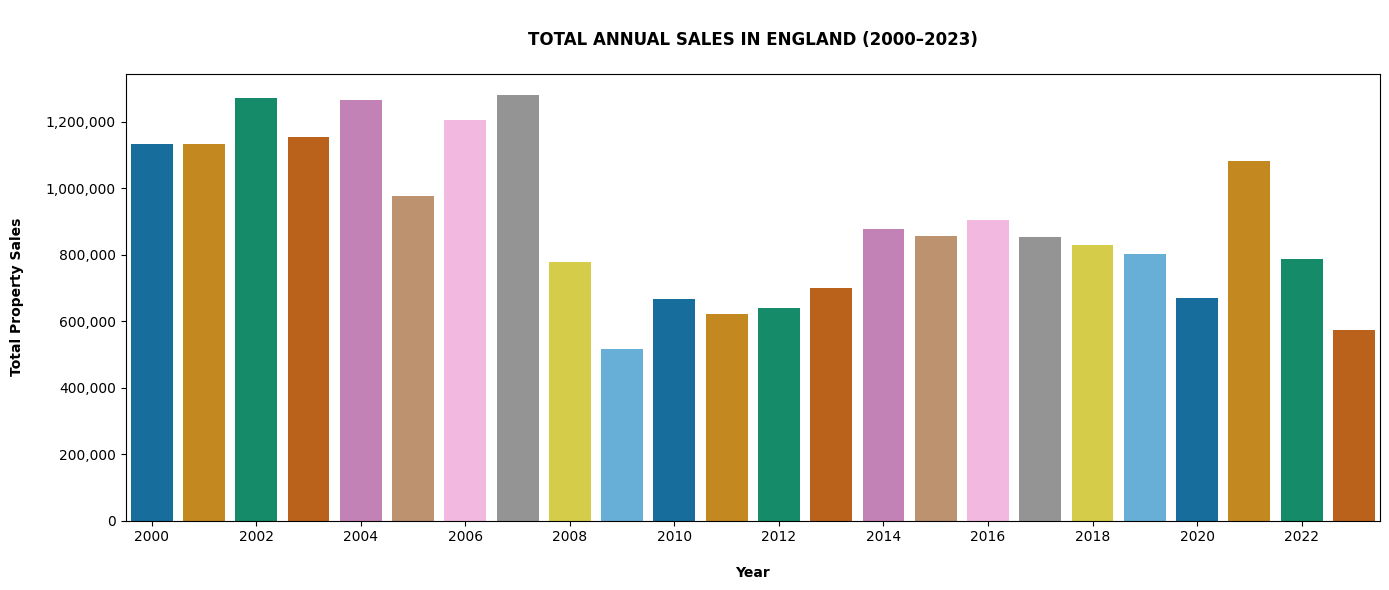

In [13]:

# ----- FIGURE 1. Total Annual Sales in England (2000 - 2023) -----

# 1. Extract the summary row for England total sales
sum_row = Sales_England[Sales_England['DISTRICT'] == 'ENGLAND_TOTAL_SALES']

# 2. Select only year columns (i.e., sales data columns with numeric names)
year_columns = [col for col in sum_row.columns if col.isnumeric()]

# 3. Extract and flatten the data into a 1D Series
year_data = sum_row[year_columns].squeeze()  # .squeeze() removes single-dimensional axis to simplify indexing

# 4. Plot
plt.figure(figsize=(14, 6))  # Set the figure size (width x height in inches)

# Create a bar plot using seaborn
sns.barplot(
    x=year_data.index,        # X-axis: years
    y=year_data.values,       # Y-axis: total sales values
    hue=year_data.index,      # Use years as hues (though disabled in legend)
    palette='colorblind',     # Use colorblind-friendly palette
    legend=False              # Disable legend to prevent redundant display
)

# 5. Format Y-axis labels to include commas (e.g., 1,200,000 instead of 1200000)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# 6. Customize X-axis ticks to show every 2 years for better readability
plt.xticks(ticks=np.arange(0, len(year_data), 2), labels=year_data.index[::2])

# 7. Add axis labels and chart title with bold font
plt.xlabel("\nYear", fontweight='bold')
plt.ylabel("Total Property Sales\n", fontweight='bold')
plt.title("\nTOTAL ANNUAL SALES IN ENGLAND (2000–2023)\n", fontweight='bold')

# 8. Adjust layout to prevent clipping of labels and title
plt.tight_layout()

# Display the plot
plt.show()



In [14]:

# ----- NEW COLUMN: Years with the Highest Number of Property Sales Across Each District (2000–2023) -----

# 1. Create a new column 'MOST_COMMON_YEARS' to store the year in which each district
#    experienced its highest number of property sales between 2000 and 2023.

# Use .idxmax(axis=1) to find the column (year) with the maximum value for each row (district).
Sales_England['MOST_COMMON_YEARS'] = Sales_England[
    [str(y) for y in range(2000, 2024)]  # List of year columns as strings
].idxmax(axis=1)

# 2. Count how many districts had their highest sales in each year.
#    This helps identify peak sales years across all districts in England.
peak_year_counts = Sales_England['MOST_COMMON_YEARS'].value_counts()

# Display the result
print('\nNUMBER OF DISTRICTS WITH PEAK SALES BY YEAR:\n')
print(peak_year_counts)



NUMBER OF DISTRICTS WITH PEAK SALES BY YEAR:

MOST_COMMON_YEARS
2007    91
2002    90
2004    46
2021    46
2000    11
2006     9
2003     2
2001     1
2016     1
Name: count, dtype: int64


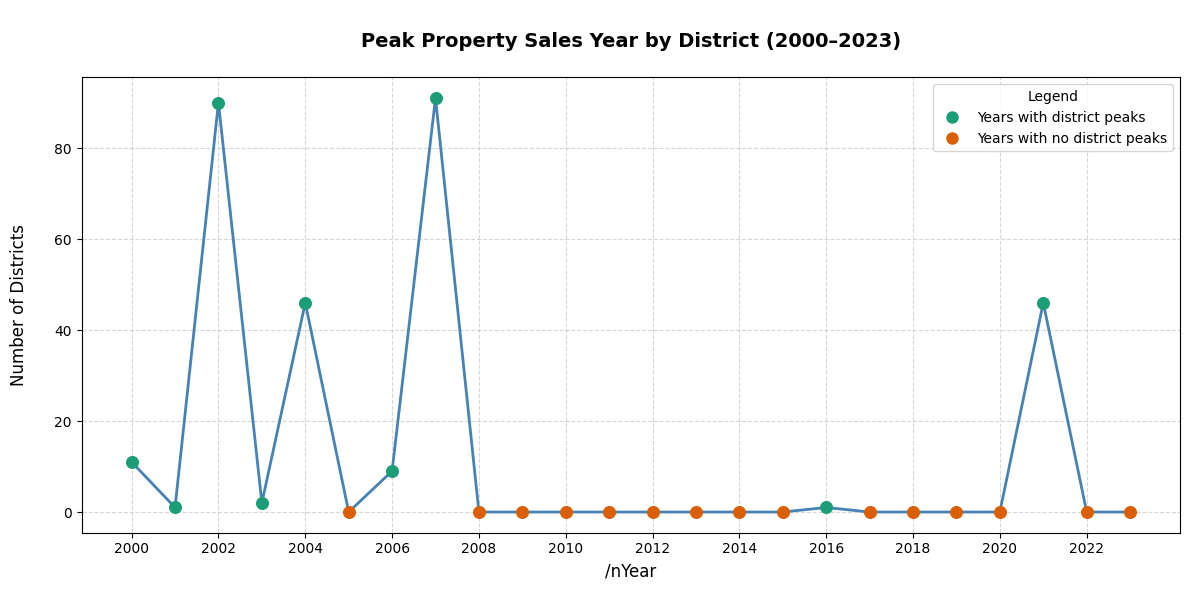

In [15]:

# ----- FIGURE 2. Peak Sales Year per District in England (2000–2023) -----

# STEP 1: Group districts by their peak sales year, including all years (2000–2023)
# This ensures that years with no peaks are represented with a value of 0
# This explicit handling of missing data avoids misleading visuals (Few, 2012).
all_years = pd.Index([str(year) for year in range(2000, 2024)])  # Generate year labels as strings
peak_years = Sales_England['MOST_COMMON_YEARS'].value_counts().reindex(all_years, fill_value=0)

# STEP 2: Start plotting the figure
plt.figure(figsize=(12, 6))  # Set figure size: 12 inches wide x 6 inches tall
plt.plot(
    peak_years.index.astype(int),  # X-axis: years converted to integers
    peak_years.values,             # Y-axis: number of districts that peaked in each year
    color='steelblue',             # Line color for continuity
    linewidth=2                    # Thicker line for emphasis
)

# STEP 3: Add dots for each year to highlight presence or absence of peak activity
# Green = at least one district peaked that year, Orange = zero peaks
for year, value in zip(peak_years.index.astype(int), peak_years.values):
    color = '#1b9e77' if value > 0 else '#d95f02'  # Colorblind-safe green or orange
    plt.scatter(year, value, color=color, s=70, zorder=5)  # Plot circle on top of the line

# STEP 4: Create a custom legend to explain dot color meanings
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Years with district peaks',
           markerfacecolor='#1b9e77', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Years with no district peaks',
           markerfacecolor='#d95f02', markersize=10)
]
plt.legend(handles=legend_elements, loc='upper right', title="Legend")

# STEP 5: Add titles, axis labels, tick formatting, and grid lines
plt.title("\nPeak Property Sales Year by District (2000–2023)\n", fontsize=14, fontweight='bold')
plt.xlabel("/nYear", fontsize=12)
plt.ylabel("Number of Districts\n", fontsize=12)
plt.xticks(ticks=range(2000, 2024, 2))  # X-axis ticks every 2 years
plt.grid(True, linestyle='--', alpha=0.5)  # Add a dashed, semi-transparent grid
plt.tight_layout()  # Automatically adjust spacing to avoid label cutoff

# STEP 6: Display the final plot
plt.show()



In [16]:

# ----- NEW COLUMN: Calculate Total Number of House Sales per District in England (2000–2023) -----

# This step calculates the total number of property sales per district over the entire study period (2000–2023).
# It helps identify regions with consistently high or low housing market activity and long-term demand trends.

# STEP 1: Identify columns that represent sales years
# Use string-digit checks and integer range filters to ensure that only year columns (2000–2023) are selected.
# This automatically excludes metadata columns like 'DISTRICT', 'CODE_LAD', and 'MOST_COMMON_YEARS'.
year_columns = [col for col in Sales_England.columns if col.isdigit() and 2000 <= int(col) <= 2023]

# STEP 2: Compute total sales per district by summing across the year columns
# axis=1 applies the sum row-wise (i.e., horizontally across years for each district)
Sales_England['TOTAL_SALES_LAD'] = Sales_England[year_columns].sum(axis=1)

# Preview the first few rows to confirm the new column was added successfully
print('\nTOTAL SALES PER DISTRICT (Sample):\n')
Sales_England.head(4)



TOTAL SALES PER DISTRICT (Sample):



DISTRICT   CODE_LAD    2000    2001    2002    2003    2004  \
0            Hartlepool  E06000001  1726.0  2140.0  2359.0  2488.0  2979.0   
1         Middlesbrough  E06000002  2280.0  2462.0  2826.0  3016.0  3339.0   
2  Redcar and Cleveland  E06000003  2266.0  2582.0  3497.0  3390.0  3138.0   
3      Stockton-on-Tees  E06000004  3978.0  4168.0  5320.0  4610.0  4471.0   

     2005    2006    2007  ...    2016    2017    2018    2019    2020  \
0  2123.0  2285.0  2290.0  ...  1273.0  1209.0  1304.0  1235.0  1050.0   
1  2817.0  3139.0  3514.0  ...  1822.0  1749.0  1819.0  1828.0  1528.0   
2  2406.0  2945.0  3376.0  ...  1824.0  1947.0  2007.0  1967.0  1636.0   
3  3293.0  4341.0  4901.0  ...  2922.0  2959.0  3090.0  3066.0  2523.0   

     2021    2022    2023  MOST_COMMON_YEARS  TOTAL_SALES_LAD  
0  1729.0  1490.0  1103.0               2004          36918.0  
1  2316.0  2035.0  1298.0               2007          49516.0  
2  2539.0  2081.0  1667.0               2002          51496.0  
3  3826.0  3063.0  2186.0               2002          78308.0  

[4 rows x 28 columns]

### **1.4 FINAL VISUALISATION**

The final visualisation presents a horizontal bar chart showing the top 20 districts in England with the highest number of residential property sales between 2000 and 2023. A horizontal layout was chosen instead of a vertical one because long category labels (district names) are easier to display and read when aligned horizontally (Wicklin, 2021).

To construct the figure, the dataset was first filtered to exclude the national aggregate row (ENGLAND_TOTAL_SALES). Next, a new column (TOTAL_SALES_LAD) was calculated by summing all year columns from 2000 to 2023 for each district, after identifying these columns programmatically to avoid including non-numeric metadata. The dataset was then sorted in descending order by total sales and the top 20 districts were selected. A perceptually uniform, colourblind-friendly colormap (viridis) was applied to ensure the chart is accessible to all users, including those with colour vision deficiencies (Wong, 2011).

A dashed vertical line was added to represent the national average of total district-level sales, providing a clear visual benchmark that supports comparative analysis (Evergreen, 2016). Lastly, axis labels were formatted with comma-separated values to improve the readability of large numbers for stakeholders and analysts.

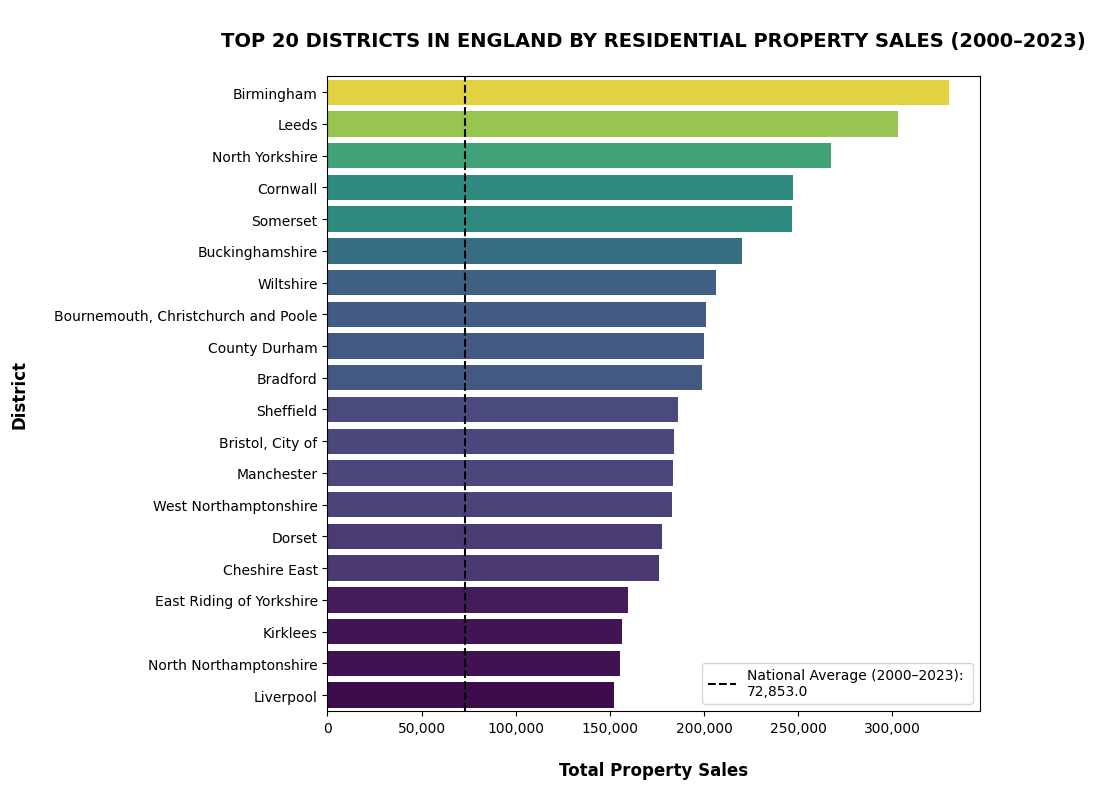

In [17]:

# ----- FIGURE 3. Top 20 Districts with the Highest Number of Sales (2000–2023) -----

# STEP 1: Filter out the national aggregate row and select top 20 districts by total sales
filtered = Sales_England[Sales_England['DISTRICT'] != 'ENGLAND_TOTAL_SALES']  # Exclude the summary row
top_avg_districts = filtered.sort_values('TOTAL_SALES_LAD', ascending=False).head(20)  # Top 20 districts

# STEP 2: Create a colorblind-friendly gradient using 'viridis'
norm = plt.Normalize(top_avg_districts['TOTAL_SALES_LAD'].min(), top_avg_districts['TOTAL_SALES_LAD'].max())  # Normalize total sales
cmap = colormaps['viridis']  # Use a perceptually uniform, colorblind-friendly colormap
colors = [cmap(norm(val)) for val in top_avg_districts['TOTAL_SALES_LAD']]  # Map sales to color gradient

# STEP 3: Calculate the national average sales across all districts
avg_sales = filtered['TOTAL_SALES_LAD'].mean()

# STEP 4: Plot the horizontal bar chart
## I asked Copilot: This message is appearing above my graph. How can I remove it?
## <ipython-input-15-96b6affc0073>:24: FutureWarning: Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.
# NOTE: To avoid the seaborn FutureWarning, explicitly set `hue='DISTRICT'` and suppress the legend.
plt.figure(figsize=(10, 8))
sns.barplot(
    x='TOTAL_SALES_LAD',
    y='DISTRICT',
    data=top_avg_districts,
    hue='DISTRICT',      # Explicitly set hue to match district (avoids warning)
    palette=colors,      # Apply the viridis-based color gradient
    legend=False)        # Do not show the legend (since hue is only used for color)


# STEP 5: Add a vertical line to show the national average
plt.axvline(
    avg_sales,
    color='black',
    linestyle='--',
    linewidth=1.5,
    label=f"National Average (2000–2023): \n{avg_sales:,.1f}")


# STEP 6: Customize title, axis labels, and legend
plt.title("\nTOP 20 DISTRICTS IN ENGLAND BY RESIDENTIAL PROPERTY SALES (2000–2023)\n", fontsize=14, fontweight='bold')
plt.xlabel("\nTotal Property Sales", fontsize=12, fontweight='bold')
plt.ylabel("District\n", fontsize=12, fontweight='bold')
plt.legend(loc='lower right')

# STEP 7: Format the X-axis to show large numbers with commas (e.g., 50,000)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Final display
plt.tight_layout()
plt.show()


## **BLOCK 2: SPATIAL VISUALISATION**

The primary aim of the second block is to analyse and visualise the distribution of bat biodiversity records (Order Chiroptera) across England (2024), with a particular focus on National Parks

**Dataset:**

1. England’s Regions Boundary - geopackage (Office for National Statistics, 2017).

2. England’s National Parks - shape (Natural England, 2024).

3. National Biodiversity Network - CSV (NBN) Human Observations (2024) (National Biodiversity Network, 2024).

**Audience:** Policymakers and the general public.

**Final Visualisation:** Chiropetra (bats) distribution inside and outside England's National Parks in 2024.


### **2.1 IMPORT PACKAGES & LOAD FILES**

To begin the analysis for Block 2, essential Python libraries were imported to support geospatial data processing and map visualisation. This block integrates three spatial layers from different sources: regional boundaries, National Park polygons, and bat observation records.

Core functionality was provided by GeoPandas for handling vector geospatial data (GeoPandas Developers, 2013), Shapely for geometric operations (Gillies & Shapely Contributors, 2011), and Contextily for adding web-based basemaps (Arribas-Bel & Contextily Contributors, 2020).

Datasets were uploaded from both GitHub and Google Drive—the latter used specifically for the NBN dataset due to file size limitations. All spatial datasets were converted to GeoJSON format to maintain consistency across the project. GeoJSON’s lightweight, text-based structure supports efficient storage, sharing, and rendering of geospatial data (González, 2022).


In [18]:

# IMPORT Additional packages for spatial and visual processing

import geopandas as gpd                                                # Extends pandas to handle geospatial (vector) data — e.g., shapefiles or GeoJSON.
                                                                       # Example: Used to read and reproject 'Dissolved_', 'england_outline', etc.

## Connect Colab to Drive to Load Data for Block 2
from google.colab import drive                                         # Allows access to Google Drive from Colab to read large files.
drive.mount('/content/drive')

# Additional Matplotlib imports for custom plotting

from matplotlib.patches import FancyArrow                              # Enables drawing custom arrows (not directly used unless for annotations like north arrows)

import matplotlib.colors as colors                                     # Tools for color mapping and normalization (not directly used in shared code)

import matplotlib.cm as cm

# Install mapping helper libraries (needed once per Colab session)
!pip install matplotlib-scalebar                                       # Adds scalebar support to Matplotlib (for map distance indicators)
!pip install contextily                                                # Adds basemap tile support (e.g., OpenStreetMap, Esri) for maps in EPSG:3857

# Then import AFTER installation (order matters in Colab)

from matplotlib_scalebar.scalebar import ScaleBar                      # Used to add a scale bar on the map
import contextily as ctx                                               # Allows adding web basemaps (e.g., Esri, Stamen) to GeoPandas plots


# Additional packages for Final spatial visualisation

import matplotlib.image as mpimg                                       # Load image files for plotting
from matplotlib.offsetbox import OffsetImage, AnnotationBbox           # Overlay images on axes
from matplotlib.patches import Rectangle                               # Draw rectangle around plot area


from shapely.geometry import Point                                     # Transforms coordinate format (e.g. used to convert coordinate values into GeoPoints for mapping)


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 86.5 MB/s eta 0:00:00


**England's boundaries**

In [19]:

# UPLOAD England's Government Office Regions, Boundaries: The analysis will focus on the country of England

GOR_England=gpd.read_file('https://github.com/ClaudiaTurner/GEOG5990M_Project/raw/main/Data_Assignment_2/GOR_England.gpkg')
GOR_England.head(2)


NAME LABEL       AREA        ACRES      PERFEET    PERIMETER  \
0  South West     K  24364.029  6020351.675  6514552.582  1985538.733   
1  South East     J  19018.057  4699361.820  4168015.332  1270349.080   

        X_COORD       Y_COORD  \
0  285014.89880  128563.64852   
1  470064.18615  172910.92997   

                                            geometry  
0  POLYGON ((154943.42 28123.247, 154940.094 2813...  
1  POLYGON ((428905.016 180734.971, 428905.595 18...

**England’s National Park Boundaries**

In [20]:

# LOAD England's National Parks (shp)

National_Parks=gpd.read_file('https://github.com/ClaudiaTurner/GEOG5990M_Project/raw/refs/heads/main/Data_Assignment_2/National_Parks_England_-4082557758695841082/National_Parks_(England)___Natural_England.shp')


# Convert to GeoJSON format. As noted by Michael (2020), GeoJSON is easier to manage, share, and render in both static and interactive maps.

National_Parks.to_file("National_Parks.gjson", driver="GeoJSON")

National_Parks = gpd.read_file("National_Parks.gjson")

National_Parks


CODE              NAME  MEASURE DESIG_DATE  \
0     5        NEW FOREST    567.0 2006-04-01   
1     3            EXMOOR    693.0 1954-10-19   
2     2          DARTMOOR    956.0 1951-10-30   
3     8     PEAK DISTRICT   1438.0 1951-04-17   
4     7  NORTH YORK MOORS   1441.0 1952-11-28   
5     4     LAKE DISTRICT   2362.0 1951-08-13   
6     1        THE BROADS    302.0 1989-04-01   
7    10       SOUTH DOWNS   1653.0 2010-03-31   
8     6    NORTHUMBERLAND   1051.0 1957-04-17   
9     9   YORKSHIRE DALES   2185.0 1954-11-16   

                                         HOTLINK      STATUS  \
0                http://www.newforestnpa.gov.uk/  Designated   
1         http://www.exmoor-nationalpark.gov.uk/  Designated   
2                   https://www.dartmoor.gov.uk/  Designated   
3                http://www.peakdistrict.gov.uk/  Designated   
4              http://www.northyorkmoors.org.uk/  Designated   
5                http://www.lakedistrict.gov.uk/  Designated   
6            http://www.broads-authority.gov.uk/  Designated   
7                      http://southdowns.gov.uk/  Designated   
8  http://www.northumberlandnationalpark.org.uk/  Designated   
9              http://www.yorkshiredales.org.uk/  Designated   

                                            geometry  
0  POLYGON ((429005.597 96087.205, 428994.499 960...  
1  POLYGON ((267560.095 141540.704, 267562.593 14...  
2  POLYGON ((267476.193 93915.606, 267478.592 939...  
3  POLYGON ((409857.902 377385.094, 409832.689 37...  
4  POLYGON ((445356.906 492417.686, 445352.313 49...  
5  POLYGON ((331944.367 541398.266, 331951.87 541...  
6  POLYGON ((634412.65 329306.78, 634413.58 32929...  
7  POLYGON ((484696.203 108041.303, 484694.801 10...  
8  POLYGON ((364851.527 567107.496, 364850.752 56...  
9  POLYGON ((382320.48 463305.39, 382319.64 46331...

**National Biodiversity Network (NBN) Records**

In [21]:

# LOAD CSV: national-biodiversity-network - Humman observations

NBN_records=pd.read_csv('/content/drive/MyDrive/Python_Assignment2/records-2025-04-14.csv')
NBN_records.head().T


0  \
NBN Atlas record ID                             fff9f8af-fb04-4723-9b0c-9f91345b700e   
Occurrence ID                                                               35147752   
Licence                                                                     CC-BY-NC   
Rightsholder                        The Mammal Society and Biological Records Centre   
Scientific name                                                  Erinaceus europaeus   
Taxon author                                                          Linnaeus, 1758   
Name qualifier                                                                   NaN   
Common name                                                                 Hedgehog   
Species ID (TVK)                                                    NBNSYS0000005078   
Taxon Rank                                                                   species   
Occurrence status                                                            present   
Start date                                                                2024-03-11   
Start date day                                                                  11.0   
Start date month                                                                 3.0   
Start date year                                                                 2024   
End date                                                                         NaN   
End date day                                                                     NaN   
End date month                                                                   NaN   
End date year                                                                    NaN   
Locality                                          South Wonston, Winchester SO21, UK   
OSGR                                                                      SU46253577   
Latitude (WGS84)                                                           51.119424   
Longitude (WGS84)                                                          -1.340585   
Coordinate uncertainty (m)                                                       2.0   
Verbatim depth                                                                   NaN   
Recorder                                                               Martin Fowler   
Determiner                                                                       NaN   
Individual count                                                                 NaN   
Abundance                                                                        NaN   
Abundance scale                                                                  NaN   
Organism scope                                                                   NaN   
Organism remarks                                                                 NaN   
Sex                                                                              NaN   
Life stage                                                                       NaN   
Occurrence remarks                                                               NaN   
Identification verification status                                Accepted - correct   
Basis of record                                                     HumanObservation   
Survey key                                             iNaturalist | UK and IOM data   
Dataset name                         National Mammal Atlas Project, online recording   
Dataset ID                                                                     dr671   
Data provider                                                         Mammal Society   
Data provider ID                                                                 dp8   
Institution code                                                                 NaN   
Kingdom                                                                     Animalia   
Phylum                                                                      Chordata   
Class                              

### **2.2 DATA CLEANSING**

**Data: NBN_records**

The cleansing process began by converting the raw CSV into a spatial format. Longitude and latitude were used to generate point geometries, then transformed into a GeoDataFrame, enabling export into GeoJSON for consistency (González, 2022).

All spatial datasets were reprojected to EPSG:27700 (British National Grid), a UK standard ensuring alignment across layers (Kraak & Ormeling, 2020).
An initial map visualised England’s regions, National Parks, and bat observations as a baseline for spatial coverage. A colourblind-friendly palette enhanced accessibility (Wong, 2011).

The data was filtered to retain Chiroptera observations from England, focusing the analysis on relevant biodiversity.

Further cleaning steps included (Gupta, 2021):
Converting column names to uppercase
Keeping only key attributes (taxonomy, count, coordinates)
Cleaning INDIVIDUAL COUNT via regex and converting to integer
Dropping rows missing COMMON NAME
The GEOMETRY column was reset with set_geometry() to fix plotting issues after renaming

Finally,England’s boundaries was dissolved into one outline for base mapping


In [22]:

# ----- CONVERTING NBN CSV DATA INTO A GEODATAFRAME -----

# Step 1: Generate point geometries using longitude and latitude coordinates
## I asked Copilot how to transgorm my csv documents to a geodata frame
geometry = [Point(xy) for xy in zip(NBN_records['Longitude (WGS84)'], NBN_records['Latitude (WGS84)'])]

# Step 2: Create a GeoDataFrame from the original DataFrame and the new geometry column
NBN_gdf = gpd.GeoDataFrame(NBN_records, geometry=geometry)

# Step 3: Export the GeoDataFrame to a GeoJSON file for spatial analysis or mapping
NBN_gdf.to_file("NBN_records.geojson", driver="GeoJSON")

# Step 4: Reload the GeoJSON file as a GeoDataFrame (if needed for further processing)
NBN_records = gpd.read_file("NBN_records.geojson");


/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [23]:

# ----- COORDINATE REFERENCE SYSTEM -----

# Check the Coordinate Reference System (CRS) of all GeoDataFrames.

print(GOR_England.crs)
print(National_Parks.crs)
print(NBN_records.crs)


EPSG:27700
EPSG:27700
EPSG:4326


In [24]:

# CHANGE CRS for NBN_records, all data should have the same CRS, change to epsg=27700, otherwise process will have problems
NBN_records= NBN_records.to_crs(epsg=27700)


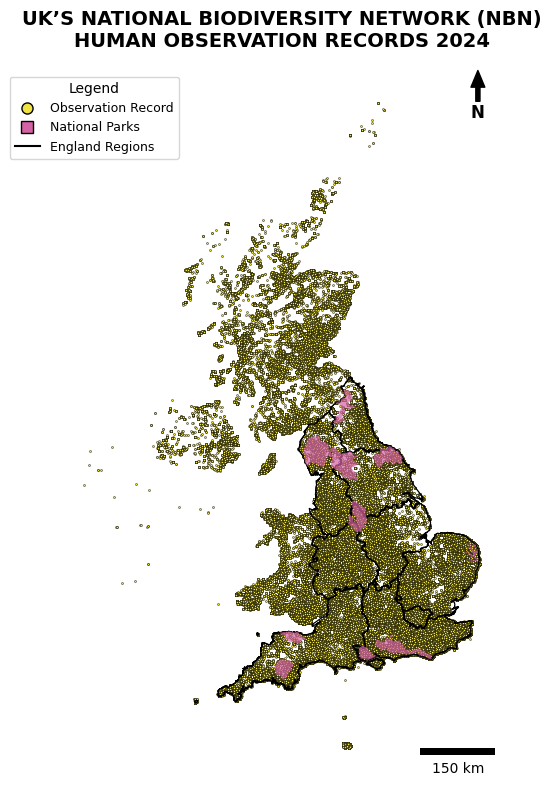

In [25]:

## ----- FIGURE 4. Visualise all uploaded layers: England's Regions, National Parks, and NBN Records -----

# 1. Set up the figure and base map
fig, ax = plt.subplots(figsize=(14, 8))  # Create a Matplotlib figure and axes with a wide aspect ratio

# Plot the boundaries of England’s Government Office Regions (GOR)
# These are plotted as outlines to serve as the geographic base
GOR_England.boundary.plot(
    ax=ax,
    edgecolor='black',      # Black lines for region borders
    linewidth=0.9,          # Thin but visible line thickness
    zorder=2                # Layer priority (above NBN points, below parks)
)

# Overlay National Park polygons with semi-transparent pink fill
# Transparency (alpha) helps reveal base features beneath
National_Parks.plot(
    ax=ax,
    color='#D462A6',        # Colorblind-friendly pink tone
    alpha=0.7,              # 70% opacity for visual blending
    zorder=3                # Above regions and NBN points
)

# 2. Plot all biodiversity observation records (e.g., bats)
# These are plotted as small circular markers with uniform styling
NBN_records.plot(
    ax=ax,
    color='#F0E442',        # Colorblind-safe yellow tone (looks light green to most)
    markersize=2,           # Small size to avoid clutter
    marker='o',             # Circular marker
    edgecolor='black',      # Black edges improve contrast on pale backgrounds
    linewidth=0.3,          # Thin edge lines
    zorder=1                # Plotted beneath all polygon layers
)

# 3. Construct and add a custom legend
# Uses Line2D proxies to show point and polygon styles
legend_items = [
    Line2D([0], [0], marker='o', color='w', label='Observation Record',
           markerfacecolor='#F0E442', markeredgecolor='black', markersize=8),
    Line2D([0], [0], marker='s', color='w', label='National Parks',
           markerfacecolor='#D462A6', markeredgecolor='black', markersize=8),
    Line2D([0], [0], color='black', lw=1.5, label='England Regions')
]

# Position the legend outside the plot frame (upper left corner)
ax.legend(
    handles=legend_items,
    title='Legend',
    loc='upper left',
    bbox_to_anchor=(-0.14, 1),  # Offset to place legend outside the plot
    fontsize=9,
    title_fontsize=10
)

# 4. Add north arrow and scale bar for geographic context

# North arrow: annotated with text and a stylized arrow
ax.annotate(
    'N',
    xy=(0.95, 1), xytext=(0.95, 0.94),  # Arrow position (relative to axes)
    arrowprops=dict(facecolor='black', width=3, headwidth=10),  # Arrow style
    ha='center', va='center',
    fontsize=12, fontweight='bold',
    xycoords=ax.transAxes  # Coordinate system relative to plot area
)

# Scale bar: 1 unit = 1 meter (EPSG assumed to be projected, not geographic)
scalebar = ScaleBar(
    dx=1, units='m',
    dimension='si-length',
    location='lower right',
    scale_loc='bottom'
)
ax.add_artist(scalebar)

# 5. Final styling: remove axes and apply layout

ax.set_axis_off()  # Hide axis ticks and spines for a clean map frame

# Add figure title with bold formatting
plt.title(
    "UK’S NATIONAL BIODIVERSITY NETWORK (NBN)\nHUMAN OBSERVATION RECORDS 2024",
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout()  # Optimize spacing to avoid clipping
plt.show()  # Render the final figure


In [26]:

# ----- FILTERING: SELECT BAT RECORDS IN ENGLAND -----
# ----- TAXONOMIC ORDER: 'Chiroptera' (bats) -----
# ----- COUNTRY: 'England' -----

# STEP 1: Filter the dataset to include only records where the taxonomic order is 'Chiroptera'.
# This narrows the data to focus exclusively on bat species — the target group for this biodiversity analysis.
NBN_records_Chiroptera = NBN_records[NBN_records['Order'] == 'Chiroptera']

# STEP 2: Further filter to include only records located in England.
# This ensures we're focusing on bat sightings specifically within England's boundaries.
NBN_records = NBN_records_Chiroptera[NBN_records_Chiroptera['State/Province'] == 'England']

# Optional check: Display the structure of the filtered dataset (transposed for easier viewing)
# This shows the first few records and their attributes to verify filtering.
NBN_records.head().T



689   \
NBN Atlas record ID                             f7fa930b-0c46-4ddc-82be-e9c2212ce800   
Occurrence ID                                                               40187410   
Licence                                                                     CC-BY-NC   
Rightsholder                        The Mammal Society and Biological Records Centre   
Scientific name                                                           Chiroptera   
Taxon author                                                        Blumenbach, 1779   
Name qualifier                                                                  None   
Common name                                                                      Bat   
Species ID (TVK)                                                    NHMSYS0000376160   
Taxon Rank                                                                     order   
Occurrence status                                                            present   
Start date                                                       2024-03-30 00:00:00   
Start date day                                                                  30.0   
Start date month                                                                 3.0   
Start date year                                                                 2024   
End date                                                                         NaT   
End date day                                                                     NaN   
End date month                                                                   NaN   
End date year                                                                    NaN   
Locality                                                       Lyth, The Howe, Cragg   
OSGR                                                                        SD455881   
Latitude (WGS84)                                                           54.286065   
Longitude (WGS84)                                                          -2.837901   
Coordinate uncertainty (m)                                                      70.7   
Verbatim depth                                                                  None   
Recorder                                            Marshall, Heather;Marshall, Tony   
Determiner                                                            Marshall, Tony   
Individual count                                                             Present   
Abundance                                                                       None   
Abundance scale                                                                 None   
Organism scope                                                                  None   
Organism remarks                                                                None   
Sex                                                                     not recorded   
Life stage                                                                     adult   
Occurrence remarks                                                              None   
Identification verification status                     Accepted - considered correct   
Basis of record                                                     HumanObservation   
Survey key                                                          iRecord | Import   
Dataset name                         National Mammal Atlas Project, online recording   
Dataset ID                                                                     dr671   
Data provider                                                         Mammal Society   
Data provider ID                                                                 dp8   
Institution code                                                                None   
Kingdom                                                                     Animalia   
Phylum                                                                      Chordata   
Class                           

In [27]:

# ----- DROPPING UNUSED COLUMNS AND STANDARDISING COLUMN NAMES TO UPPERCASE -----

# STEP 1: Keep only the relevant columns needed for analysis and mapping.
# This reduces memory usage and simplifies further processing.
NBN_records = NBN_records[
    ['Class', 'Order', 'Family', 'Genus', 'Licence',
     'Scientific name', 'Common name', 'Individual count',
     'Latitude (WGS84)', 'Longitude (WGS84)']
]

# STEP 2: Standardize all column names by converting them to uppercase.
# This ensures consistency and avoids case-related issues in downstream processing.
NBN_records.columns = NBN_records.columns.str.upper()

# STEP 3: Preview the cleaned dataset to verify changes.
NBN_records.head()



CLASS       ORDER            FAMILY     GENUS   LICENCE  \
689   Mammalia  Chiroptera              None      None  CC-BY-NC   
747   Mammalia  Chiroptera              None      None     CC-BY   
1502  Mammalia  Chiroptera  Vespertilionidae  Nyctalus       OGL   
1508  Mammalia  Chiroptera  Vespertilionidae  Plecotus  CC-BY-NC   
1570  Mammalia  Chiroptera  Vespertilionidae  Plecotus  CC-BY-NC   

          SCIENTIFIC NAME             COMMON NAME INDIVIDUAL COUNT  \
689            Chiroptera                     Bat          Present   
747            Chiroptera                     Bat                3   
1502     Nyctalus noctula                 Noctule             None   
1508  Plecotus austriacus     Grey Long-eared Bat                1   
1570             Plecotus  Long-eared Bat species                1   

      LATITUDE (WGS84)  LONGITUDE (WGS84)  
689          54.286065          -2.837901  
747          52.099180          -2.679310  
1502         53.068550          -2.531257  
1508         50.840000          -0.880000  
1570         50.842448          -0.881541

In [28]:

# ----- CHECKING DATA TYPE -----

# We focus on key columns: 'ORDER', 'COMMON NAME', and 'INDIVIDUAL COUNT',
# which are critical for grouping, counting, and summarising observations.

# It's especially important to ensure that 'INDIVIDUAL COUNT' is numeric (preferably integer),
# so we can safely perform aggregation and quantitative analysis without errors or type coercion.

# Display the data types of all columns in the dataset
NBN_records.dtypes


CLASS                 object
ORDER                 object
FAMILY                object
GENUS                 object
LICENCE               object
SCIENTIFIC NAME       object
COMMON NAME           object
INDIVIDUAL COUNT      object
LATITUDE (WGS84)     float64
LONGITUDE (WGS84)    float64
dtype: object

In [29]:

# ----- VALIDATING AND CONVERTING 'INDIVIDUAL COUNT' TO NUMERIC -----

# The 'INDIVIDUAL COUNT' column should contain only whole numbers (integers).
# This step ensures that non-numeric or malformed entries are removed and the column is safely converted.

# STEP 1: Keep only rows where 'INDIVIDUAL COUNT' consists of digits (e.g., '5', '12')
# Regex ^\d+$ ensures only whole numbers; excludes decimal points, text, or blanks
NBN_records = NBN_records.loc[
    NBN_records['INDIVIDUAL COUNT'].astype(str).str.match(r'^\d+$', na=False)
]

# STEP 2: Convert the validated 'INDIVIDUAL COUNT' values to integer type
# This allows for aggregation and mathematical operations
NBN_records['INDIVIDUAL COUNT'] = NBN_records['INDIVIDUAL COUNT'].astype(int)

# STEP 3: Optional preview — display the cleaned DataFrame
print(NBN_records.head())



         CLASS       ORDER            FAMILY        GENUS   LICENCE  \
747   Mammalia  Chiroptera              None         None     CC-BY   
1508  Mammalia  Chiroptera  Vespertilionidae     Plecotus  CC-BY-NC   
1570  Mammalia  Chiroptera  Vespertilionidae     Plecotus  CC-BY-NC   
2072  Mammalia  Chiroptera  Vespertilionidae     Plecotus  CC-BY-NC   
2299  Mammalia  Chiroptera     Rhinolophidae  Rhinolophus  CC-BY-NC   

                SCIENTIFIC NAME             COMMON NAME  INDIVIDUAL COUNT  \
747                  Chiroptera                     Bat                 3   
1508        Plecotus austriacus     Grey Long-eared Bat                 1   
1570                   Plecotus  Long-eared Bat species                 1   
2072           Plecotus auritus    Brown Long-eared Bat                 2   
2299  Rhinolophus ferrumequinum   Greater Horseshoe Bat                 1   

      LATITUDE (WGS84)  LONGITUDE (WGS84)  
747          52.099180          -2.679310  
1508         50.840000

**Eliminating Null Values from NBN Records**

In [30]:

# ----- NULL VALUES -----

# Check for null values in the columns 'ORDER', 'COMMON NAME', and 'INDIVIDUAL COUNT'.
# These fields should be as clean as possible to ensure reliable analysis.
NBN_records.isnull().sum()


CLASS                  0
ORDER                  0
FAMILY               126
GENUS                127
LICENCE                0
SCIENTIFIC NAME        0
COMMON NAME            1
INDIVIDUAL COUNT       0
LATITUDE (WGS84)       0
LONGITUDE (WGS84)      0
dtype: int64

In [31]:

# ----- REMOVE RECORDS WITH MISSING SPECIES NAMES -----

# Remove rows where the 'COMMON NAME' column contains null (NaN) values.
# This step ensures that each record has a valid species identifier, which is
# essential for grouping, filtering, and visualising species-level data.

NBN_records = NBN_records.dropna(subset=['COMMON NAME'])


In [32]:

# ----- ELIMINATE COLUMNS & STANDARDISE COLUMN NAMES IN NATIONAL PARKS DATA -----

# STEP 1: Retain only essential columns — 'NAME' and 'geometry'
# This reduces dataset size and removes irrelevant attributes
National_Parks = National_Parks[['NAME', 'geometry']]

# STEP 2: Rename 'geometry' column to uppercase ('GEOMETRY') for consistency with naming conventions
# Note: GeoPandas no longer recognises it as the active geometry column after renaming
National_Parks = National_Parks.rename(columns={'geometry': 'GEOMETRY'})

# STEP 3: Re-establish 'GEOMETRY' as the active geometry column in the GeoDataFrame
# Without this, functions like plotting or CRS access will raise errors
National_Parks = National_Parks.set_geometry('GEOMETRY')

# STEP 4: Preview cleaned and standardised dataset
National_Parks.head()



NAME                                           GEOMETRY
0        NEW FOREST  POLYGON ((429005.597 96087.205, 428994.499 960...
1            EXMOOR  POLYGON ((267560.095 141540.704, 267562.593 14...
2          DARTMOOR  POLYGON ((267476.193 93915.606, 267478.592 939...
3     PEAK DISTRICT  POLYGON ((409857.902 377385.094, 409832.689 37...
4  NORTH YORK MOORS  POLYGON ((445356.906 492417.686, 445352.313 49...

In [33]:

# ----- DISSOLVE ENGLAND'S REGIONS BOUNDARIES -----

# This step merges all regional polygons in the GOR_England layer into a single unified boundary.
# The dissolve operation removes internal borders and creates a single multipart geometry
# representing the national outline of England.

england_outline = GOR_England.dissolve()

# Display the resulting dissolved GeoDataFrame to confirm the operation
print(england_outline)

# Check the coordinate reference system (CRS) to ensure spatial consistency with other layers
print(england_outline.crs)



                                            geometry        NAME LABEL  \
0  MULTIPOLYGON (((90247.795 12767.667, 90845.708...  South West     K   

        AREA        ACRES      PERFEET    PERIMETER      X_COORD       Y_COORD  
0  24364.029  6020351.675  6514552.582  1985538.733  285014.8988  128563.64852  
EPSG:27700



### 2.3 EXPLORING THE DATAFRAME AND GEOPROCESSING

The exploration began by reporting the number of bat species and total individuals recorded in England in 2024, establishing a baseline for analysis. The 20 most frequently observed species were then identified. Observation counts were grouped by common name, and naming inconsistencies (e.g., “Bats” vs. “Bat”) were standardised for clarity. Non-numeric and missing values in the ‘INDIVIDUAL COUNT’ column were validated and converted to integers to ensure reliable aggregation.

To highlight spatial patterns, individual bat counts were reclassified into four bins (‘1’, ‘2–5’, ‘6–15’, ‘>15’); the ‘1’ category was separated due to its high frequency (>60%). These were visualised using scaled point symbols—larger circles representing higher counts—to support rapid interpretation, following best practices in thematic mapping (Kraak & Ormeling, 2020).

A bar chart was used to show total individuals per species, an effective method for comparing categorical data (Evergreen, 2016). This was paired with a dot distribution map using a categorical colormap, preserving the raw location of records without introducing artificial boundaries, thereby maintaining spatial accuracy (Kraak & Ormeling, 2020).

A spatial join using the ‘inner’ method was applied to identify National Parks containing bat observations (Gupta, 2021). This join retained only parks with intersecting records, ensuring that parks with no matching observations were excluded from the resulting map, followed by a dissolve() operation to sum individuals per park. A second join (‘left’ method) classified each observation as “Inside” or “Outside National Parks,” allowing regional comparison. Finally, a clip operation isolated only records within protected areas for targeted mapping.


In [34]:

# ----- BEFORE FURTHER EXPLORATION, REPORT TOTAL SPECIES AND INDIVIDUALS RECORDED IN 2024 -----

# Number of unique bat species
print('How many different bat species were recorded in England in 2024?')
print(NBN_records['COMMON NAME'].nunique())

# Total number of individuals observed
print('\nHow many Chiroptera (bat) individuals were recorded in England in 2024?')
print(NBN_records['INDIVIDUAL COUNT'].sum())


How many different bat species were recorded in England in 2024?
23

How many Chiroptera (bat) individuals were recorded in England in 2024?
6703


In [35]:

# ----- EXPLORING THE DATA -----

# STEP 1: Identify the 20 most frequently observed bat species (by common name)
# This gives an overview of which bat species appear most often in the dataset
top_names = NBN_records['COMMON NAME'].value_counts().nlargest(20)

# STEP 2: Calculate the total number of individual bats observed per species
# This complements the count of records by showing relative abundance
total_individuals = NBN_records.groupby('COMMON NAME')['INDIVIDUAL COUNT'].sum()

# STEP 3: Combine both attributes into a single summary DataFrame
# This merges observation frequency and total individuals for comparison
summary = pd.DataFrame({
    'Observation Count': top_names,
    'Total Individuals': total_individuals
}).dropna()  # Drop rows not in top 20 (ensures alignment)

# STEP 4: Sort the table by number of observations (descending)
summary = summary.sort_values(by='Observation Count', ascending=False)

# STEP 5: Display the summary table
print(summary)


                         Observation Count  Total Individuals
COMMON NAME                                                  
Common Pipistrelle                   253.0               3146
Soprano Pipistrelle                  173.0               1421
Bat                                  126.0                315
Brown Long-eared Bat                 125.0                532
Noctule                               72.0                126
Pipistrelle                           64.0                117
Daubenton's Bat                       40.0                 91
Natterer's Bat                        32.0                188
Pipistrelle Bat species               32.0                 83
Lesser Horseshoe Bat                  29.0                132
Serotine                              28.0                 33
Myotis Bat species                    19.0                 22
Long-eared Bat species                17.0                 17
Barbastelle                           14.0                 17
Greater 

In [36]:

# ----- STANDARDISE INCONSISTENT COMMON NAMES -----

# After reviewing the summary table, an inconsistency was found:
# Some records listed 'Bats' instead of the singular form 'Bat'.
# To maintain consistency in grouping and counting, we will merge both under a unified label: 'Bat'.

# STEP: Replace plural form 'Bats' with 'Bat' in the 'COMMON NAME' column
NBN_records['COMMON NAME'] = NBN_records['COMMON NAME'].replace({'Bats': 'Bat'})


In [37]:

# ----- FREQUENCY OF INDIVIDUAL COUNTS -----

# Check how often each 'INDIVIDUAL COUNT' value appears in the dataset.
# Useful for identifying typical observation sizes and spotting outliers.
NBN_records['INDIVIDUAL COUNT'].value_counts().nlargest(20)


INDIVIDUAL COUNT
1       692
2       122
3        72
4        40
5        31
6        15
12        8
10        8
15        7
7         7
13        5
8         5
17        4
9         4
20        4
19        3
24        3
11        2
1000      2
14        2
Name: count, dtype: int64

In [38]:

# ----- RECLASSIFICATION OF INDIVIDUAL COUNTS -----

# Reclassify 'INDIVIDUAL COUNT' into bins for easier visual interpretation (e.g., on maps or charts).
# This helps generalise data by grouping values into ranges, improving readability and reducing noise.

NBN_records['NBN_records_reclass'] = pd.cut(
    NBN_records['INDIVIDUAL COUNT'],
    bins=[0, 1, 5, 15, float('inf')],         # Define value ranges
    labels=['1', '2–5', '6–15', '>15'],       # Assign readable class labels
    include_lowest=True                      # Include boundary values
)

# Print the number of records in each reclassified category
print('RECLASSIFIED NUMBER OF RECORDS')
print(NBN_records['NBN_records_reclass'].value_counts(), '\n\n')


RECLASSIFIED NUMBER OF RECORDS
NBN_records_reclass
1       692
2–5     265
6–15     63
>15      41
Name: count, dtype: int64 




In [39]:

# ----- FIXING GEOMETRY: CONVERT TO GeoDataFrame AND REPROJECT -----

# After processing the tabular data, 'NBN_records' became a standard DataFrame and lost its spatial geometry.
# To perform spatial operations (e.g., plotting, CRS transformations), we must:
# 1. Recreate a geometry column using the WGS84 coordinates (longitude, latitude)
# 2. Convert it into a GeoDataFrame
# 3. Reproject to match the target CRS (British National Grid: EPSG:27700)

from shapely.geometry import Point

# STEP 1: Create GeoDataFrame from latitude and longitude columns (WGS84)
NBN_records = gpd.GeoDataFrame(
    NBN_records,
    geometry=[Point(xy) for xy in zip(NBN_records['LONGITUDE (WGS84)'], NBN_records['LATITUDE (WGS84)'])],
    crs="EPSG:4326"  # Set original CRS to WGS84 (longitude/latitude in degrees)
)

# STEP 2: Reproject to EPSG:27700 (British National Grid)
# This ensures consistency with national boundaries and basemap tiles
NBN_records = NBN_records.to_crs("EPSG:27700")


<ipython-input-40-84b323e38aea>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(species))


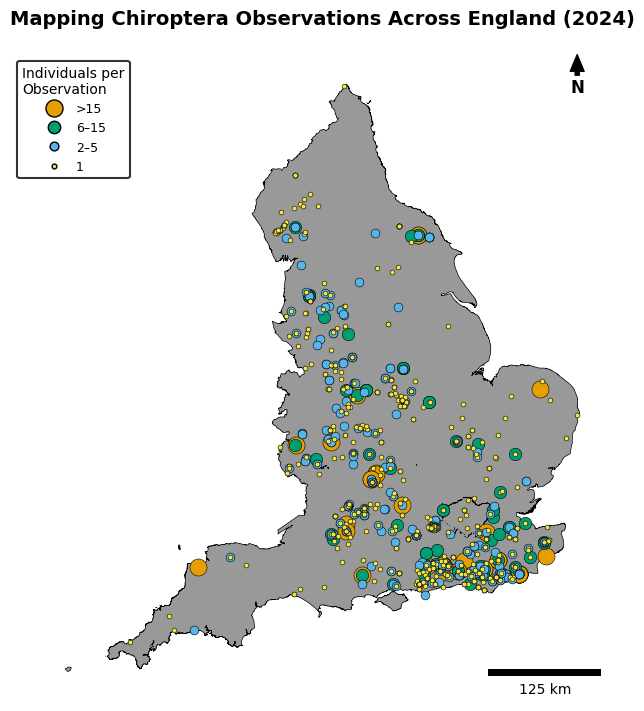

In [40]:

# FIGURE 5. Mapping Chiroptera Observations Across England (2024)

# Generate a map visualising observation frequency—dot size is scaled by 'INDIVIDUAL COUNT'

# Prepare COMMON NAME
NBN_records['COMMON NAME'] = NBN_records['COMMON NAME'].astype('category')
species = NBN_records['COMMON NAME'].cat.categories
cmap = cm.get_cmap('tab20', len(species))

# Reclassify observation counts
reclass_colors = {
    '1': '#F0E442',
    '2–5': '#56B4E9',
    '6–15': '#009E73',
    '>15': '#E69F00'
}
reclass_sizes = {
    '1': 12,
    '2–5': 40,
    '6–15': 80,
    '>15': 150
}
plot_order = ['>15', '6–15', '2–5', '1']
NBN_records['NBN_records_reclass'] = NBN_records['NBN_records_reclass'].astype('category')

# Setup figure
fig, (ax1) = plt.subplots(1,figsize=(14, 7), constrained_layout=True)

# --------------------------
# LEFT MAP: Reclassified counts
# --------------------------
england_outline.plot(ax=ax1, color='#999999', linewidth=0.5,edgecolor='black',zorder=1)
for label in plot_order:
    subset = NBN_records[NBN_records['NBN_records_reclass'] == label]
    ax1.scatter(
        subset.geometry.x, subset.geometry.y,
        color=reclass_colors[label],
        s=reclass_sizes[label],
        edgecolor='black',
        linewidth=0.4,
        label=label,
        zorder=2
    )

# Legend for left
legend_left = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=reclass_colors[label],
           markeredgecolor='black',
           markersize=reclass_sizes[label]**0.5)
    for label in plot_order
]
leg1 = ax1.legend(
    handles=legend_left,
    title="Individuals per\nObservation",
    loc='upper left',
    bbox_to_anchor=(-.05, 1),
    fontsize=9,
    title_fontsize=10,
    frameon=True
)
leg1.get_frame().set_edgecolor('black')
leg1.get_frame().set_linewidth(1.5)

# Scalebar and north arrow
ax1.add_artist(ScaleBar(1, units='m', dimension='si-length', location='lower right'))
ax1.annotate('N', xy=(0.95, 1), xytext=(0.95, 0.95),
             arrowprops=dict(facecolor='black', width=3, headwidth=10),
             ha='center', va='center', fontsize=12, fontweight='bold',
             xycoords=ax1.transAxes)

ax1.set_title("Mapping Chiroptera Observations Across England (2024)\n", fontsize=14, fontweight='bold')
ax1.axis('off')


# Show final plot
plt.show()



<ipython-input-53-d5503c329817>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(species))


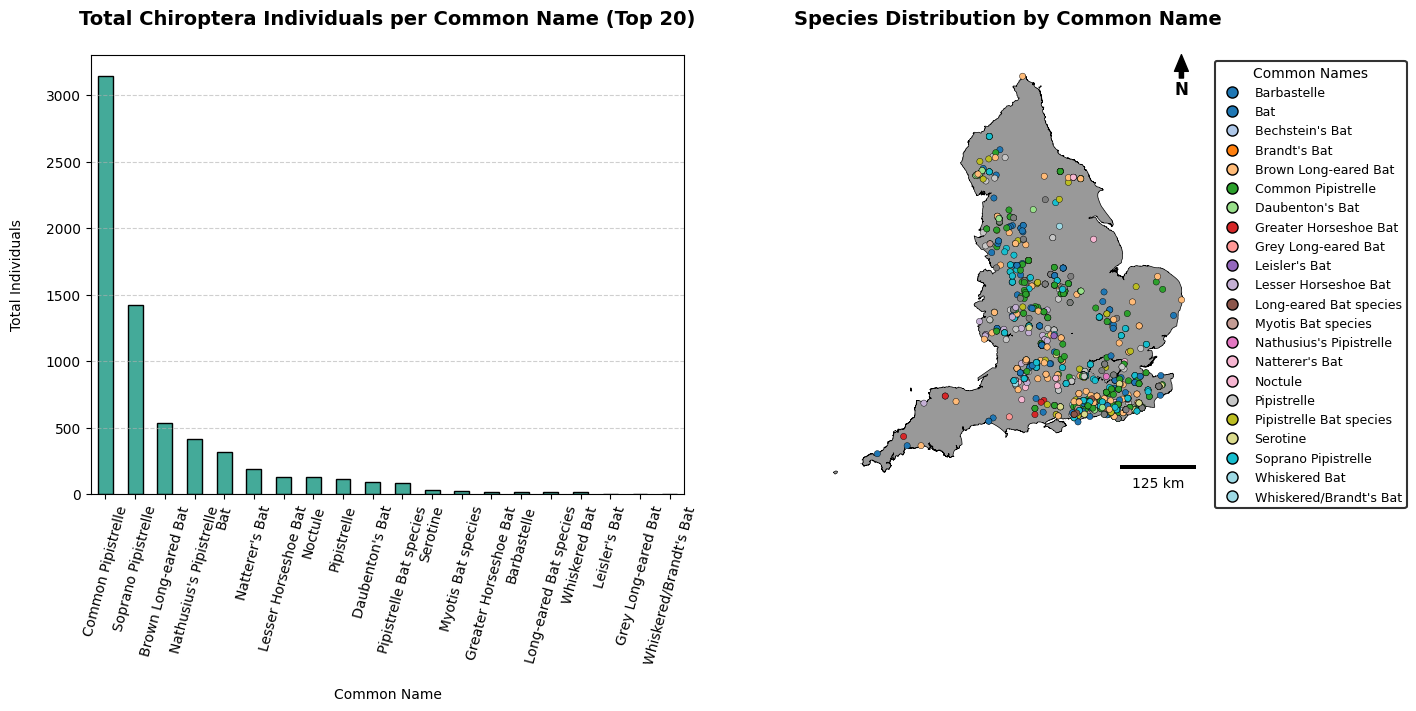

In [53]:

# ----- FIGURE 6. Number of Individuals Recorded for the 25 Most Common Bat Species

# Prepare common name color mapping
NBN_records['COMMON NAME'] = NBN_records['COMMON NAME'].astype('category')
species = NBN_records['COMMON NAME'].cat.categories
cmap = cm.get_cmap('tab20', len(species))

# Sort summary for bar chart
sorted_summary = summary.sort_values(by='Total Individuals', ascending=False)

# Setup side-by-side figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), constrained_layout=True)

# ----------------------
# LEFT PLOT: Bar chart
# ----------------------
sorted_summary['Total Individuals'].plot(
    kind='bar',
    color='#44AA99',
    edgecolor='black',
    ax=ax1)

ax1.set_title('Total Chiroptera Individuals per Common Name (Top 20)\n', fontsize=14, fontweight='bold')
ax1.set_xlabel('\nCommon Name')
ax1.set_ylabel('Total Individuals\n')
ax1.tick_params(axis='x', rotation=75)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# ----------------------
# RIGHT PLOT: Species map
# ----------------------
england_outline.plot(ax=ax2, color='#999999', edgecolor='black', linewidth=0.5)
NBN_records.plot(
    ax=ax2,
    column='COMMON NAME',
    categorical=True,
    cmap=cmap,
    marker='o',
    markersize=20,
    edgecolor='black',
    linewidth=0.3,
    legend=False)

# Custom legend for species
legend_items = [
    Line2D([0], [0], marker='o', color='w', label=sp,
           markerfacecolor=cmap(i / len(species)),
           markeredgecolor='black',
           markersize=8)
    for i, sp in enumerate(species)]

leg = ax2.legend(
    handles=legend_items,
    title='Common Names',
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    fontsize=9,
    title_fontsize=10,
    frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.5)

# North arrow and scale
ax2.add_artist(ScaleBar(1, units='m', dimension='si-length', location='lower right'))
ax2.annotate('N', xy=(0.95, 1), xytext=(0.95, 0.92),
             arrowprops=dict(facecolor='black', width=3, headwidth=10),
             ha='center', va='center', fontsize=12, fontweight='bold',
             xycoords=ax2.transAxes)

ax2.set_title("Species Distribution by Common Name\n", fontsize=14, fontweight='bold')
ax2.axis('off')

# Show combined plot
plt.show()


In [ ]:

# ----- SPATIAL JOIN: DETERMINE IF OBSERVATIONS OCCUR INSIDE NATIONAL PARKS -----

# STEP 1: Perform spatial join to match each bat observation with any intersecting National Park polygon
# 'how="left"' keeps all NBN records; matching park data will be added where geometries intersect
NBN_with_park_info = gpd.sjoin(
    NBN_records,
    National_Parks[['NAME', 'GEOMETRY']],
    how='left',
    predicate='intersects'  # Spatial predicate: intersecting geometries
)

# STEP 2: Create a new column indicating whether the record is inside or outside a National Park
# If 'index_right' from the join is not null, the point intersects a park
NBN_with_park_info['Park_Status'] = NBN_with_park_info['index_right'].notna().map({
    True: 'Inside National Parks',
    False: 'Outside National Parks'
})

# STEP 3: Aggregate total number of individuals recorded by park status
# This groups the observations into inside vs. outside National Parks and sums the individuals
summary = (
    NBN_with_park_info
    .groupby('Park_Status')['INDIVIDUAL COUNT']
    .sum()
    .reset_index()
    .rename(columns={'INDIVIDUAL COUNT': 'Total_Individuals'})
)

# STEP 4: Preview the summary table
summary



In [ ]:

# To view the total number of observations within each national park, a spatial join is needed to sum the observations that fall within each park's boundaries.
National_Park_Observations=gpd.sjoin(National_Parks,NBN_records, how='inner', predicate='intersects')

National_Park_Observations.head()


In [ ]:

# ----- ERROR CONTEXT: FAILED INTEGER CONVERSION -----

## When I ran the code below, I received the ValueError: invalid literal for int() with base 10: '2–5'
## “I asked Copilot for assistance in debugging the issue.

National_Park_Observations['INDIVIDUAL COUNT'] = National_Park_Observations['INDIVIDUAL COUNT'].astype(int)


In [ ]:

# ----- DISSOLVE NATIONAL PARKS BY NAME AND SUM INDIVIDUAL COUNTS -----

# STEP 1: Spatially dissolve park polygons by 'NAME' and sum 'INDIVIDUAL COUNT' within each park.
# This creates a single merged geometry per park and aggregates the observation totals.
Dissolved_ = National_Park_Observations.dissolve(
    by='NAME', aggfunc={'INDIVIDUAL COUNT': 'sum'})

# STEP 2: Optional — reset index to move 'NAME' from index to a regular column
# If you skip this step, 'NAME' remains as the GeoDataFrame index (can still be used but is less convenient for plotting or merging).
Dissolved_ = Dissolved_.reset_index()

# STEP 3: Preview the resulting dissolved data
print(Dissolved_.head(10))



In [ ]:

# ----- CLIP -----

# Clip NBN observations to include only those within England's National Parks.
# This step is intended for plotting purposes only, as it made it easier to map the points within park boundaries.
Clip_Chiropetra=gpd.clip(NBN_records,National_Parks)



# ----- CLIP: LIMIT OBSERVATIONS TO NATIONAL PARKS -----

# Clip Chiroptera observations so that only points falling within National Park boundaries are retained.
# This is primarily for cartographic clarity — e.g., focusing points the map on protected areas(this way was easier for me).
# Note: The original 'NBN_records' remains unchanged; this creates a subset GeoDataFrame.

Clip_Chiropetra = gpd.clip(NBN_records, National_Parks)



###**2.4 FINAL SPATIAL VISUALISATION**

The final map shows the distribution of bat observations (Order Chiroptera) across England in 2024, distinguishing records inside and outside National Parks. It is aimed at policymakers to assess where protected areas may need reinforcement, and at the public to raise awareness of biodiversity patterns.

A colourblind-friendly, CUD-compliant palette was used for accessibility and contrast (Jenny & Kelso, 2007). Observations inside National Parks were represented with slightly enlarged orange markers, while those outside were shown in yellow . National Parks were colour-coded individually, with a custom legend showing park names and bat counts to support local comparison. A dot map was selected instead of a choropleth to preserve detailed locations without introducing artificial boundaries, following thematic mapping principles (Kraak & Ormeling, 2020).

All spatial layers were reprojected to EPSG:3857 to align with the Esri basemap (Battersby et al., 2014; Esri, n.d.). Cartographic elements such as a north arrow, scale bar, and basemap supported orientation and context. Bat images were included to enhance visual engagement for educational or public audiences.




In [ ]:

# ----- FIGURE 7. SPATIAL DISTRIBUTION OF BATS IN AND OUTSIDE ENGLAND'S NATIONAL PARKS (2024) -----

# --- Reproject all spatial data to EPSG:3857 (Web Mercator) to match basemap tile coordinates ---
Dissolved_proj = Dissolved_.to_crs(epsg=3857)             # National Park polygons
england_outline_proj = england_outline.to_crs(epsg=3857)  # National boundary outline
NBN_records_proj = NBN_records.to_crs(epsg=3857)          # All bat observation points
Clip_Chiropetra_proj = Clip_Chiropetra.to_crs(epsg=3857)  # Filtered points within parks

# --- Sort National Parks by total individuals to plot smaller counts first ---
# This ensures that smaller polygons (with lower values) are not hidden under larger ones
Dissolved_sorted = Dissolved_proj.sort_values(by='INDIVIDUAL COUNT')

# --- Assign a unique, CUD-compliant color to each park using a color map ---
# Helps distinguish parks visually, even for users with color vision deficiency
cud_colors = ['#E69F00', '#56B4E9', '#009E73', '#CC79A7', '#a65628']
color_map = {name: cud_colors[i % len(cud_colors)] for i, name in enumerate(Dissolved_sorted['NAME'])}

# --- Create legend entries for each park with square markers and their total count ---
legend_elements = [
    Line2D([0], [0], marker='s', color='w',
           label=f"{row['NAME']}:\n{int(row['INDIVIDUAL COUNT'])}",
           markerfacecolor=color_map[row['NAME']], markeredgecolor='black')
    for _, row in Dissolved_sorted.iterrows()
]

# --- Set up a new Matplotlib figure and axis ---
fig, ax = plt.subplots(figsize=(9, 8))  # Fixed aspect ratio for square layout

# --- Plot each park polygon individually with its assigned color ---
for name in Dissolved_sorted['NAME']:
    Dissolved_sorted[Dissolved_sorted['NAME'] == name].plot(
        ax=ax,
        color=color_map[name],        # Use park-specific color
        edgecolor='black',            # Black outline for visibility
        linewidth=0.5,
        zorder=2,                     # Layer priority: below points
        alpha=0.6                     # Semi-transparent fill
    )

# --- Draw the boundary of England as background context ---
england_outline_proj.boundary.plot(ax=ax, color='#999999', linewidth=0.6, zorder=9)  # Border line
england_outline_proj.plot(ax=ax, color='#999999', linewidth=0.6, alpha=0.3, zorder=1)  # Light grey fill

# --- Replot original park boundaries as bold black outlines ---
Dissolved_proj.boundary.plot(ax=ax, color='black', linewidth=0.7, zorder=10)

# --- Define color scheme for bat records by park status (inside or outside) ---
status_colors = {
    'Inside National Parks': '#D55E00',   # Orange-red
    'Outside National Parks': '#dede00'   # Yellow-green
}

# --- Plot all bat observations with color coding and generate legend entries ---
legend_points = []
for status, color in status_colors.items():
    subset = summary[summary['Park_Status'] == status]  # Filter by classification
    if not subset.empty:
        NBN_records_proj.plot(
            ax=ax,
            color=color,
            markersize=7,
            edgecolor='black',
            linewidth=0.5,
            zorder=4  # Layer above polygons
        )
        # Add point legend
        legend_points.append(
            Line2D([0], [0], marker='o', color='w',
                   label=f"{status}: \n{int(subset['Total_Individuals'].values[0])}",
                   markerfacecolor=color, markeredgecolor='black', markersize=8)
        )

# --- Highlight the filtered Chiroptera-only records with large red markers ---
Clip_Chiropetra_proj.plot(
    ax=ax,
    color='#D55E00',
    marker='o',
    markersize=20,
    edgecolor='black',
    linewidth=0.5,
    zorder=6  # Top layer
)

# --- Add Esri WorldStreetMap as a basemap (tiles from contextily) ---
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap, alpha=0.6)

# --- Add a clean, white scale bar in the lower right corner ---
scalebar = ScaleBar(
    dx=1, units='m',
    location='lower right',
    scale_loc='bottom',
    box_alpha=0.1,
    box_color='white',
    pad=2.5
)
ax.add_artist(scalebar)

# --- Add separator line in legend between polygons and point symbols ---
separator = [Line2D([0], [0], color='black', lw=0.8, label="")]

# --- Calculate total bat count across all records for legend display ---
total_chiroptera = summary['Total_Individuals'].sum()
summary_lines = [Line2D([0], [0], color='none', label=f"\nTotal Chiroptera:\n{int(total_chiroptera)}")]

# --- Combine all legend elements (polygons + points + total count) ---
leg = ax.legend(
    handles=legend_elements + separator + legend_points + summary_lines,
    title='National Park Observations',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    fontsize=9,
    title_fontsize=10,
    frameon=True
)
# Style the legend title and border
leg.set_title('\nLEGEND\n\nBat Count per National Park\n', prop={'weight': 'bold', 'size': 9})
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1)

# --- Add a North arrow to the top right of the map ---
ax.annotate('N', xy=(0.95, 0.95), xytext=(0.95, 0.90),
            arrowprops=dict(facecolor='black', width=3, headwidth=10),
            ha='center', va='center', fontsize=12, fontweight='bold',
            xycoords=ax.transAxes)

# --- Hide all axes ticks and labels for a clean cartographic layout ---
ax.set_axis_off()

# --- Add map title ---
plt.title("\nCHIROPTERA DISTRIBUTION INSIDE AND OUTSIDE \nENGLAND'S NATIONAL PARKS – 2024\n",
          fontsize=14, fontweight='bold')

# --- Draw a black rectangular border around the entire map area ---
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.add_patch(Rectangle(
    (xmin, ymin), xmax - xmin, ymax - ymin,
    linewidth=1.5, edgecolor='black', facecolor='none', zorder=9
))

# --- Define helper function to add image overlays to map (e.g., bat photos) ---
def add_image_to_map(ax, path, zoom=0.1, xy=(0.1, 0.1)):
    img = mpimg.imread(path)                      # Read image from file
    imagebox = OffsetImage(img, zoom=zoom)        # Resize image
    ab = AnnotationBbox(imagebox, xy,
                        xycoords='axes fraction',  # Use axes-relative coordinates
                        frameon=False)
    ax.add_artist(ab)

# --- Add decorative bat images from local Google Drive path ---
add_image_to_map(ax, "/content/drive/MyDrive/Python_Assignment2/Chiropetra_2.jpg", zoom=0.2, xy=(1.22, 1))
add_image_to_map(ax, "/content/drive/MyDrive/Python_Assignment2/Chiropetra_1.jpg", zoom=0.1, xy=(0.05, 1.05))

# --- Save the final figure as a high-resolution PNG for export or publication ---
plt.savefig("Bats_UK.png", dpi=300, bbox_inches='tight')

# --- Display the map ---
plt.show()


### **REFERENCES AND ACKNOWLEDGEMENTS**

Battersby, S.E., Finn, M.P., Usery, E.L. and Hegarty, M. 2014. Implications of Web Mercator and Its Use in Online Mapping. Cartographica: The International Journal for Geographic Information and Geovisualization. [Online]. 49(2), pp.85–101. [Accessed 6 May 2025]. Available from: https://doi.org/10.3138/carto.49.2.2313

Arribas-Bel, D. & Contextily Contributors. 2020. contextily: context geo-tiles in Python. [Online]. [Accessed 9 May 2025]. Available from: https://contextily.readthedocs.io

Earth Lab. Coordinate Reference System and Spatial Projection. [Online]. [Accessed 6 May 2025]. Available from: https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/intro-to-coordinate-reference-systems/

Esri. n.d. Coordinate systems and projections. [Online]. [Accessed 6 May 2025]. Available from: https://pro.arcgis.com/en/pro-app/latest/help/mapping/properties/coordinate-systems-and-projections.htm

Evergreen, S. 2016. Data Visualization Checklist. [Online]. [Accessed 5 May 2025]. Available from: https://stephanieevergreen.com/wp-content/uploads/2016/10/DataVizChecklist_May2016.pdf


GeoPandas Developers. 2013. GeoPandas: Python tools for geographic data. [Online]. [Accessed 9 May 2025]. Available from: https://geopandas.org

Government Digital Service, Cabinet Office, and Geospatial Commission. 2022. UK Geospatial Data Standards – Coordinate Reference Systems. [Online]. [Accessed 6 May 2025]. Available from: https://www.gov.uk/guidance/uk-geospatial-data-standards-coordinate-reference-systems

Gillies, S. & Shapely Contributors. 2011. Shapely: manipulation and analysis of geometric objects. [Online]. [Accessed 9 May 2025]. Available from: https://shapely.readthedocs.io

González, M. 2022. Geospatial Data Representation: The GeoJSON Format. [Online]. [Accessed 5 May 2025]. Available from: https://datascience.aero/geospatial-data-representation-the-geojson-format/

Gupta, P. 2021. Practical Data Science with Jupyter: Explore Data Cleaning, Pre-processing, Data Wrangling, Feature Engineering and Machine Learning using Python and Jupyter. Birmingham: Packt Publishing.


IUCN. 2024. The IUCN Red List of Threatened Species. [Online]. [Accessed 6 May 2025]. Available from: https://www.iucnredlist.org/

Jenny, B. and Kelso, N.V. 2007. Designing maps for the colour-vision impaired. Cartographic Perspectives. [Online]. (58), pp.61–67. [Accessed 6 May 2025]. Available from: https://cartographicperspectives.org/index.php/journal/article/view/cp58-jenny-kelso/pdf


Kraak, M.-J. and Ormeling, F., 2020. Cartography: Visualization of Geospatial Data. 4th ed. Abingdon: Routledge.


Matplotlib Developers. 2024. Matplotlib: Python plotting library. [Online]. [Accessed 9 May 2025]. Available from: https://matplotlib.org

matplotlib-scalebar. 2023. matplotlib-scalebar. [Online]. [Accessed 9 May 2025]. Available from: https://pypi.org/project/matplotlib-scalebar/


Nelli, F. 2023. Python Data Analytics: With Pandas, NumPy, and Matplotlib. 3rd ed. [Online]. Apress. [Accessed 5 May 2025]. Available from: https://doi.org/10.1007/978-1-4842-9532-8


Nomis. 2024. Residential Property Sales (RPS), September 2024. [Online]. [Accessed 5 May 2025]. Available from: https://www.nomisweb.co.uk/datasets/rps


Rajagopalan, G. 2021. Python Data Analyst's Toolkit: Learn Python and Python-Based Libraries with Applications in Data Analysis and Statistics. Berkeley, CA: Apress, an imprint of Springer Nature.

Walker, M. 2020. Python Data Cleaning Cookbook: Modern techniques and Python tools to detect and remove dirty data and extract key insights. Birmingham: Packt Publishing.

Wicklin, R. 2021. Horizontal bar charts are useful for comparing many categories. 12 April. The DO Loop. [Online]. [Accessed 4 May 2025]. Available from: https://blogs.sas.com/content/iml/2021/04/12/horizontal-bar-chart.html

Wong, B. 2011. Points of view: Color blindness. Nature Methods. [Online]. 8(6), p.441. [Accessed 5 May 2025]. Available from: https://www.nature.com/articles/nmeth.1618


I acknowledge the use of Microsoft Copilot (Microsoft, https://copilot.cloud.microsoft/?fromCode=cmcv2&redirectId=D726E512100847918961BFEF6A6051A4&auth=2, accessed May 8th, 2025) to assist in debugging map rendering errors and providing assistance.

Prompts:

How to transform my CSV documents to a geodata frame

How can I standardise the name just to 'Bat'


After introducing the code, year 2023 is not visible, why?

How to combine two attribute tables

How can I add images to my map?

How can I fix the following error: AttributeError: The CRS attribute of a GeoDataFrame without an active geometry column is not defined.

How to fix the AttributeError: 'DataFrame' object has no attribute 'geometry'

How to include only the years and not the 'MOST_COMMON_YEARS' when calculating TOTAL_SALES_LAD

Please assist with debugging the ValueError: invalid literal for int() with base 10: '2–5'

This message is appearing above my graph: '<ipython-input-15-96b6affc0073>:24: FutureWarning: Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect'  How can I remove it?